# <center> Sequential Data-Consistent Inversion - ADCIRC Example </center>
___
<font color='blue'><center>**Carlos del-Castillo-Negrete, Rylan Spence**</center></font>
    <br>
    <center>University of Texas at Austin
    <br>
    carlos.delcastillo@utexas.edu, rylan.spence@utexas.edu</center>
___

TODO:
- Add citation for paper


## Getting dataset

If running from within DesignSafe, data should be under the project directory PRJ-3492 at the path `~/NHERI-Published/PRJ-3492/` in your jupyter instance.

Otherwise [download published dataset](https://doi.org/10.17603/ds2-bmrf-y737) and place in same path as this notebook.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from pydci import PCAMUDProblem, OfflineSequential
from pydci.examples import adcirc as ad
from pydci.utils import get_df
from pydci.log import disable_log, enable_log, logger
from pydci.plotting import DEF_RC_PARAMS


DEF_RC_PARAMS = {
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "axes.labelsize": 16,
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "axes.titlepad": 1,
    "axes.labelpad": 1,
    "font.size": 16,
    "savefig.facecolor": "white",
}

plt.rcParams.update(DEF_RC_PARAMS)

In [2]:
path_ds = Path.home() / "NHERI-Published/PRJ-3492/si-inlet-full-ds.pickle"
path_local = Path.cwd() / "../data/si-inlet-full-ds.pickle"
ds_path = path_ds
if not path_ds.exists():
    if not path_local.exists():
        raise FileNotFoundError("Dataset not found")
    ds_path = path_local

full_ds = ad.load_full_ds(ds_path)

In [3]:
import pickle

with open("/Users/carlos/repos/mud-data/adcirc-si.pkl", "rb") as f:
    raw_data = pickle.load(f)
wind_data = pd.DataFrame(
    {"time": raw_data["wind_speed"][0], "wind_speed": raw_data["wind_speed"][1]}
)
wind_data.to_csv(
    "/Users/carlos/repos/mud-data/adcirc-si-wind.csv", index=False, header=True
)

In [4]:
std_dev = 0.1
seed = 21

In [5]:
ret = ad.build_ds(
    data=full_ds, seed=seed, std_dev=std_dev, outpath="../data/pydci_si_example"
)

data_df = ret["data"]
data_df

ts  shift_idx  sample_flag  lam_true_0  lam_true_1  \
0    2018-01-01 00:03:00          0         True    0.067243    0.002568   
1    2018-01-01 00:06:00          0         True    0.067243    0.002568   
2    2018-01-01 00:09:00          0         True    0.067243    0.002568   
3    2018-01-01 00:12:00          0         True    0.067243    0.002568   
4    2018-01-01 00:15:00          0         True    0.067243    0.002568   
...                  ...        ...          ...         ...         ...   
6128 2018-01-13 23:45:00          0         True    0.067243    0.002568   
6129 2018-01-13 23:48:00          0         True    0.067243    0.002568   
6130 2018-01-13 23:51:00          0         True    0.067243    0.002568   
6131 2018-01-13 23:54:00          0         True    0.067243    0.002568   
6132 2018-01-13 23:57:00          0         True    0.067243    0.002568   

      q_lam_true_0  q_lam_obs_0  
0        -0.160002    -0.165198  
1        -0.159192    -0.170311  
2        -0.158108    -0.053929  
3        -0.156425    -0.282099  
4        -0.154186    -0.079647  
...            ...          ...  
6128     -0.156296    -0.096440  
6129     -0.167302    -0.256805  
6130     -0.178476    -0.330839  
6131     -0.189576    -0.291820  
6132     -0.201683    -0.309149  

[6133 rows x 7 columns]

In [6]:
samples_df = ret["samples"]
samples_df

lam_0     lam_1   q_lam_0   q_lam_1   q_lam_2   q_lam_3   q_lam_4  \
0    0.093865  0.002217 -0.098529 -0.098187 -0.097603 -0.096297 -0.094471   
1    0.073952  0.002513 -0.149888 -0.149366 -0.148671 -0.147051 -0.144599   
2    0.059847  0.001664  0.009024  0.009842  0.010425  0.010887  0.011452   
3    0.040349  0.001561  0.030676  0.031019  0.031184  0.031288  0.031271   
4    0.049240  0.003691 -0.115084 -0.112887 -0.110688 -0.107900 -0.104600   
..        ...       ...       ...       ...       ...       ...       ...   
993  0.055597  0.002976 -0.150908 -0.148516 -0.146042 -0.142579 -0.138269   
994  0.060459  0.002982 -0.180696 -0.177620 -0.174413 -0.170387 -0.165490   
995  0.049044  0.002823 -0.113886 -0.111741 -0.109616 -0.106887 -0.103613   
996  0.036092  0.002299 -0.036399 -0.034519 -0.032745 -0.030712 -0.028603   
997  0.076454  0.002550 -0.157459 -0.156550 -0.155543 -0.154001 -0.151789   

      q_lam_5   q_lam_6   q_lam_7  ...  q_lam_6123  q_lam_6124  q_lam_6125  \
0   -0.092910 -0.092280 -0.092804  ...   -0.031317   -0.040351   -0.050015   
1   -0.142349 -0.141211 -0.141387  ...   -0.096050   -0.105088   -0.114628   
2    0.011629  0.010814  0.008978  ...    0.088413    0.079203    0.069547   
3    0.030790  0.029591  0.027613  ...    0.109560    0.100329    0.090722   
4   -0.101529 -0.099412 -0.098575  ...   -0.053479   -0.063066   -0.073423   
..        ...       ...       ...  ...         ...         ...         ...   
993 -0.134226 -0.131524 -0.130446  ...   -0.096083   -0.105813   -0.116276   
994 -0.160565 -0.157006 -0.155492  ...   -0.128567   -0.137712   -0.147994   
995 -0.100548 -0.098421 -0.097572  ...   -0.051925   -0.061532   -0.071904   
996 -0.027022 -0.026373 -0.026784  ...    0.038204    0.028407    0.017975   
997 -0.149445 -0.147780 -0.147443  ...   -0.102618   -0.112080   -0.122103   

     q_lam_6126  q_lam_6127  q_lam_6128  q_lam_6129  q_lam_6130  q_lam_6131  \
0     -0.060054   -0.070415   -0.081188   -0.092421   -0.103996   -0.115751   
1     -0.124460   -0.134574   -0.145131   -0.156176   -0.167739   -0.179283   
2      0.059593    0.049343    0.038682    0.027550    0.016001    0.004138   
3      0.080934    0.070816    0.060206    0.049101    0.037551    0.025542   
4     -0.084119   -0.095033   -0.106318   -0.118181   -0.130594   -0.143590   
..          ...         ...         ...         ...         ...         ...   
993   -0.127136   -0.138285   -0.149806   -0.161832   -0.174512   -0.187535   
994   -0.159056   -0.170856   -0.183221   -0.195793   -0.208266   -0.221700   
995   -0.082644   -0.093631   -0.104994   -0.116927   -0.129399   -0.142426   
996    0.007227   -0.003762   -0.015099   -0.026851   -0.038969   -0.051372   
997   -0.132250   -0.142370   -0.153046   -0.163931   -0.175075   -0.186152   

     q_lam_6132  
0     -0.127697  
1     -0.191110  
2     -0.007969  
3      0.013429  
4     -0.156585  
..          ...  
993   -0.200639  
994   -0.235379  
995   -0.155378  
996   -0.064029  
997   -0.198172  

[998 rows x 6135 columns]

In [7]:
lam_ref = get_df(data_df, "lam_true", size=2)[0]
lam_ref

array([0.06724306, 0.00256819])

# Fig 1 - ADCIRC T3 Iterative Set-UP

Problem Setup:
    - T3 time window from previous study
    - 4 chunks of 12 hour data read in

In [9]:
def split_range(mask, n_splits):
    return [range(x[0], x[-1]) for x in np.array_split(mask, n_splits)]


n_splits = 4
t3 = ["2018-01-07 00:00:00", "2018-01-09 00:00:00"]
t3_mask = data_df.index[(data_df["ts"] > t3[0]) & (data_df["ts"] < t3[1])].values
t3_mask = range(min(t3_mask), max(t3_mask))

intervals = split_range(t3_mask, n_splits)

plot_intervals = [
    (f"{n_splits} Intervals", {"color": "orange", "linestyle": "-"}, intervals),
]

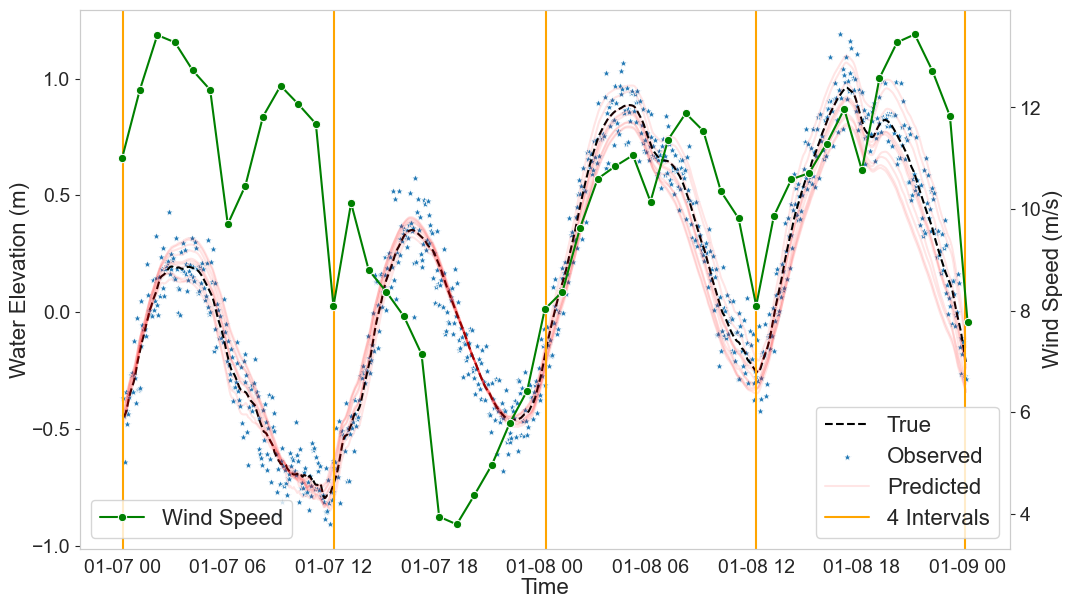

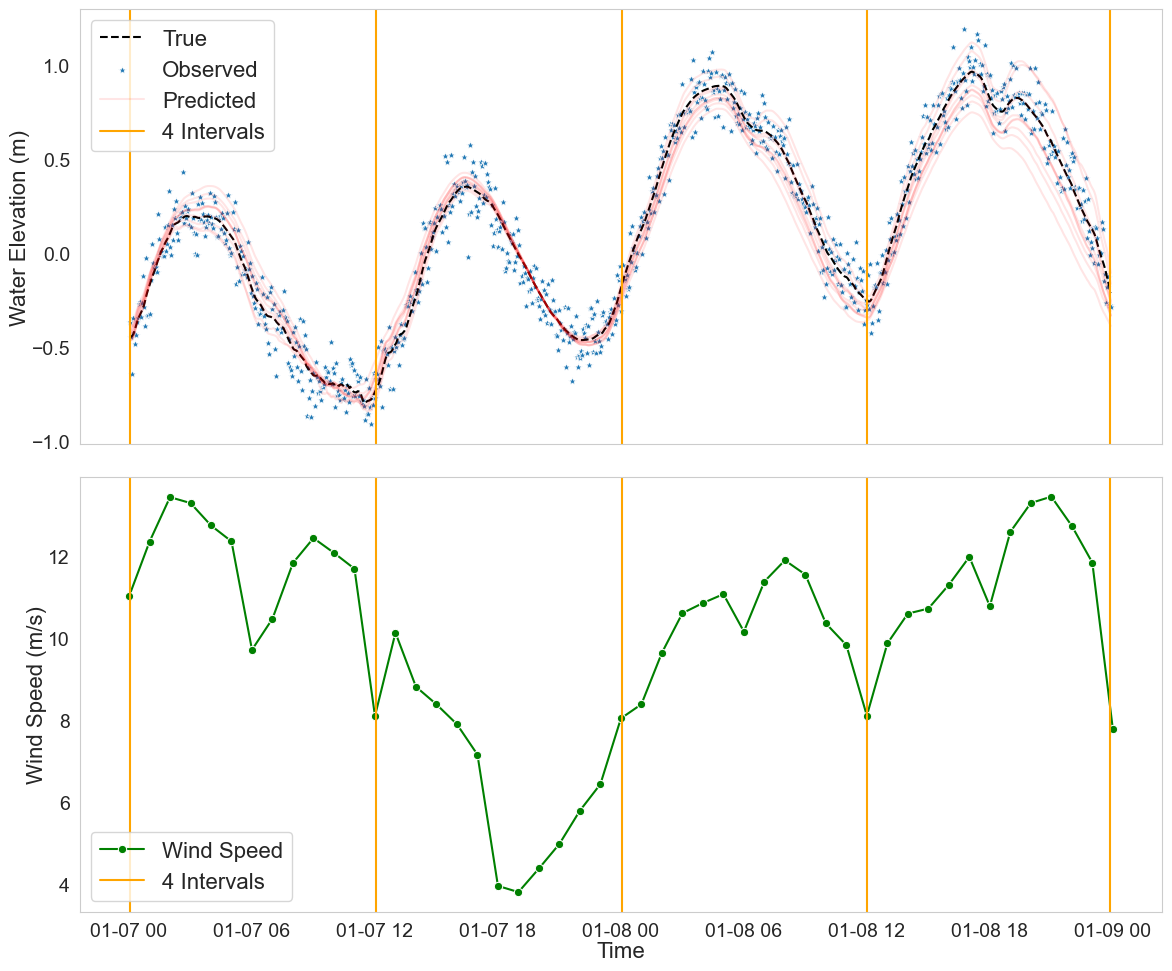

In [12]:
import seaborn as sns

sns.set_style("whitegrid", {"axes.grid": False})
ax = ad.plot_state(data_df, samples_df, t3_mask, plot_intervals=plot_intervals)
ax.legend(loc="lower right")
# Duplicate y axis
ax2 = ax.twinx()
ad.plot_wind(data_df, wind_data, time_window=t3, ax=ax2)


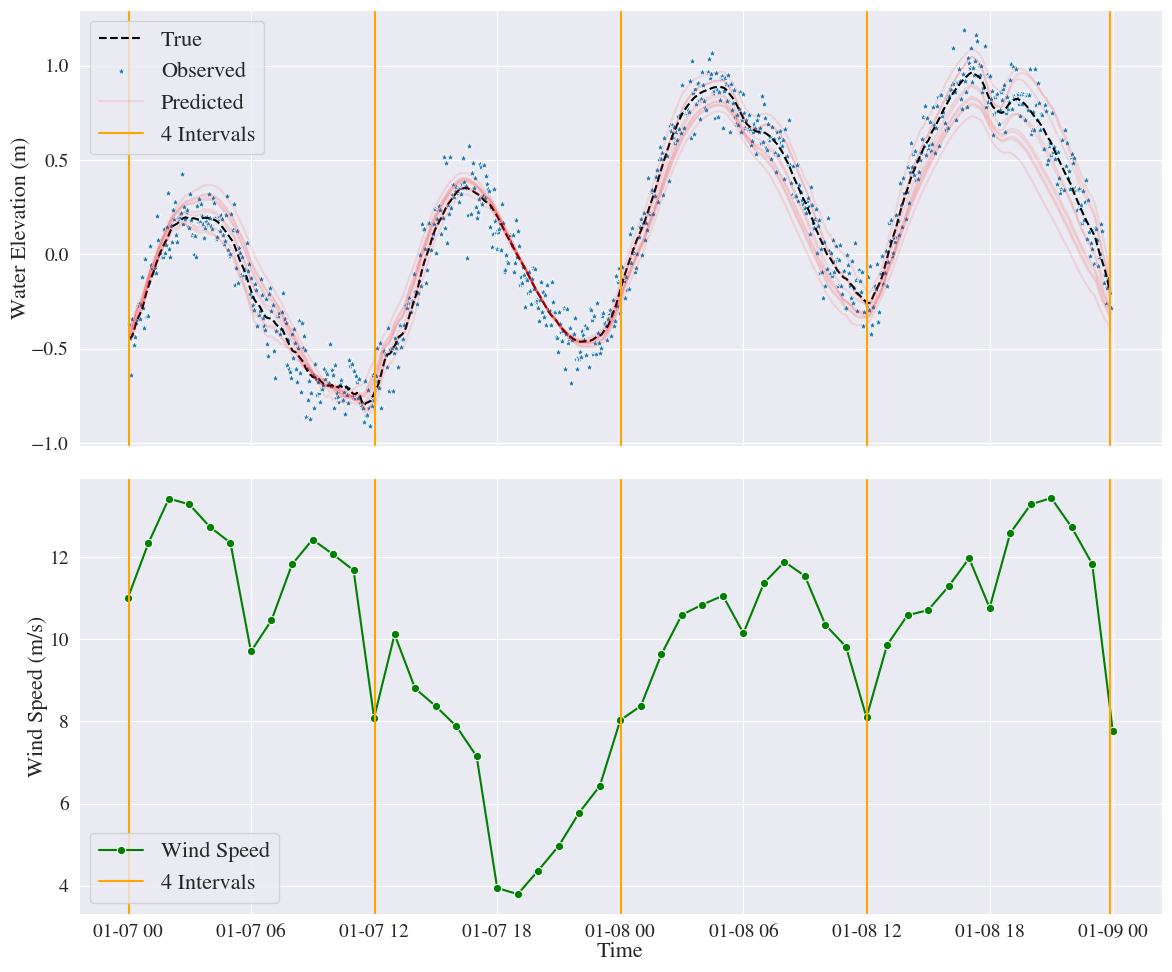

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ad.plot_state(data_df, samples_df, t3_mask, plot_intervals=plot_intervals, ax=axs[0])
ad.plot_wind(data_df, wind_data, time_window=t3, ax=axs[1], plot_intervals=plot_intervals)
fig.tight_layout()

# Fig 2 - Solving Using $Q_{PCA}$ Map FULL vs Iterative Solution

Solve using full time window of data using the $Q_{PCA}$ map, using one and two components as before.

In [9]:
pca = [None, None]
pca[0] = PCAMUDProblem(samples_df, data_df, std_dev)
pca[0].set_weights([])
pca[0].solve(pca_components=[0], pca_mask=t3_mask)
pca[0].result

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.208838  2.920785   0.088594   0.002541      155            [0]   

            pca_mask  
0  range(2774, 3732)

In [10]:
pca[1] = PCAMUDProblem(samples_df, data_df, std_dev)
pca[1].set_weights([])
pca[1].solve(pca_components=[0, 1], pca_mask=t3_mask)
pca[1].result

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.129287  4.347987   0.069212   0.002584      439         [0, 1]   

            pca_mask  
0  range(2774, 3732)

In [11]:
# TODO: Add skip option if e_r value outside of threshold on iterative solves.
pca_it = OfflineSequential(samples_df, data_df, std_dev)
enable_log(file="test.log")
pca_it.solve(
    pca_mask=t3_mask, pca_splits=n_splits, pca_components=[[0]], exp_thresh=1e10
)
pca_it.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.103141  1.469817   0.080046   0.002479      403            [0]   
0  0.810056  1.174189   0.063742   0.002642      377            [0]   
0  1.066731  0.561245   0.067741   0.002538      905            [0]   
0  0.884539  1.585180   0.063742   0.002642      377            [0]   

            pca_mask  i  num_splits  
0  range(2774, 3014)  0           4  
0  range(3014, 3254)  1           4  
0  range(3254, 3493)  2           4  
0  range(3493, 3732)  3           4

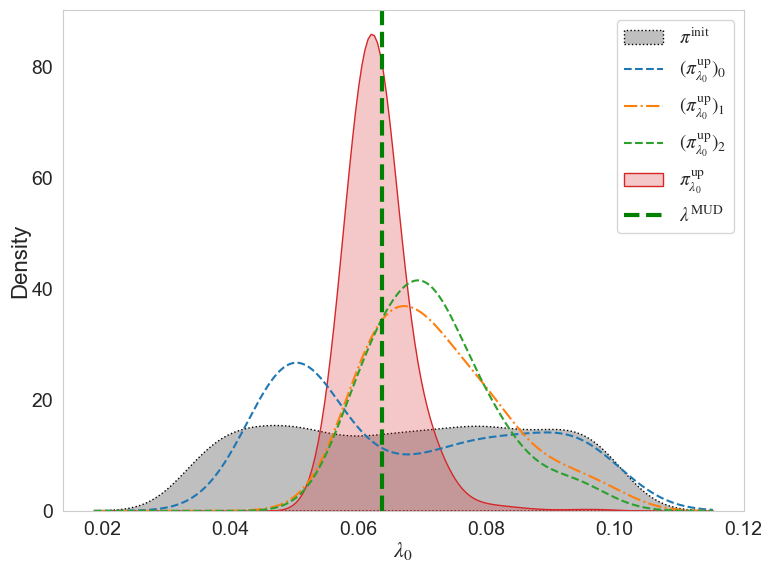

In [12]:
pca_it.plot_iterations(shade=False, iterations=[0, 1, 2])

In [13]:
import importlib
import pydci.consistent_bayes.OfflineSequentialSearch as oss

importlib.reload(oss)

<module 'pydci.consistent_bayes.OfflineSequentialSearch' from '/Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py'>

In [14]:
enable_log(level="DEBUG")
search_prob = oss.OfflineSequentialSearch(samples_df, data_df, std_dev)
search_list = search_prob.get_search_combinations(
    max_nc=2, all_data=True, split_range=[1, 4]
)
search_list

[08/07/23 10:56:46] INFO     Logger initialized                                                           ]8;id=79165;file:///Users/carlos/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=177149;file:///Users/carlos/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    DEBUG    PCA search range range(0, 2)                            ]8;id=975500;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py\OfflineSequentialSearch.py]8;;\:]8;id=498845;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py#277\277]8;;\

                    DEBUG    Data chunk end points: [6133]                           ]8;id=543195;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py\OfflineSequentialSearch.py]8;;\:]8;id=286787;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py#286\286]8;;\

                    DEBUG    # of splits: [1, 4]                                     ]8;id=347193;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py\OfflineSequentialSearch.py]8;;\:]8;id=115403;file:///Users/carlos/repos/pyDCI/src/pydci/consistent_bayes/OfflineSequentialSearch.py#291\291]8;;\

[{'exp_thresh': 10000000000.0,
  'pca_components': [[0]],
  'pca_mask': range(0, 6133),
  'pca_splits': 1},
 {'exp_thresh': 10000000000.0,
  'pca_components': [[0]],
  'pca_mask': range(0, 6133),
  'pca_splits': 4},
 {'exp_thresh': 10000000000.0,
  'pca_components': [[0, 1]],
  'pca_mask': range(0, 6133),
  'pca_splits': 1},
 {'exp_thresh': 10000000000.0,
  'pca_components': [[0, 1]],
  'pca_mask': range(0, 6133),
  'pca_splits': 4}]

In [15]:
disable_log()
search_prob.solve(
    search_list,
    exp_thresh=0.2,
    best_method="max_kl",
    def_args={"pca_mask": t3_mask},
)

Solving for different combinations |                                        | ▂▄

Solving for different combinations |████████████████████████████████████████| 4/


In [16]:
search_prob.result

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.129287  4.347987   0.069212   0.002584      439         [0, 1]   

   num_splits  search_index  predict_delta  within_thresh  closest  max_kl  \
0           1             2       0.129287           True    False    True   

   min_kl  
0   False

In [17]:
search_prob.search_results

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.208838  2.920785   0.088594   0.002541      155            [0]   
0  0.884539  1.585180   0.063742   0.002642      377            [0]   
0  1.129287  4.347987   0.069212   0.002584      439         [0, 1]   
0  0.553552  3.058896   0.063742   0.002642      377         [0, 1]   

   num_splits  search_index  predict_delta  within_thresh  closest  max_kl  \
0           1             0       0.208838          False    False   False   
0           4             1       0.115461           True     True   False   
0           1             2       0.129287           True    False    True   
0           4             3       0.446448          False    False   False   

   min_kl  
0   False  
0    True  
0   False  
0   False

In [18]:
groups = search_prob.full_search_results.groupby("search_index")
groups.get_group(1)

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.103141  1.469817   0.080046   0.002479      403            [0]   
0  0.810056  1.174189   0.063742   0.002642      377            [0]   
0  1.066731  0.561245   0.067741   0.002538      905            [0]   
0  0.884539  1.585180   0.063742   0.002642      377            [0]   

            pca_mask  i  num_splits  search_index  predict_delta  \
0  range(2774, 3014)  0           4             1       0.103141   
0  range(3014, 3254)  1           4             1       0.189944   
0  range(3254, 3493)  2           4             1       0.066731   
0  range(3493, 3732)  3           4             1       0.115461   

   within_thresh  closest  max_kl  min_kl  
0           True    False   False   False  
0           True    False   False   False  
0           True     True   False    True  
0           True    False   False   False

In [19]:
groups.get_group(0)

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.208838  2.920785   0.088594   0.002541      155            [0]   

            pca_mask  i  num_splits  search_index  predict_delta  \
0  range(2774, 3732)  0           1             0       0.208838   

   within_thresh  closest  max_kl  min_kl  
0          False    False   False   False

In [20]:
def adcirc_density_plots(
    plot_1=False, plot_2=False, plot_iterative=False, plot_iterations=False, ax=None
):
    if ax is None:
        fig, ax = plt.subplots(1, 2, figsize=(14, 7))

    full_kw = "Full"
    true_label = "$\lambda^\dagger$"

    for j in range(2):
        labels = ["$\pi^{init}$"]
        ax_1, _ = pca[0].plot_L(
            ax=ax[j],
            param_idx=j,
            initial_kwargs={"color": "black", "linestyle": ":", "fill": False},
            update_kwargs={"color": "blue", "linestyle": "-", "fill": False}
            if plot_1
            else None,
            plot_legend=False,
            mud_kwargs={"color": "blue"} if plot_1 else None,
            lam_true=None if plot_iterative or plot_2 else [lam_ref],
        )
        if plot_1:
            l = f"{full_kw} (1 PC)" if plot_2 else full_kw
            labels += ["$\pi^{up}$ - " + l]
            labels += [f"$\lambda^\mathrm{{MUD}}$ - " + l]
            if not plot_iterations and not plot_2:
                labels += [true_label]

        if plot_2:
            ax_1, _ = pca[1].plot_L(
                ax=ax[j],
                param_idx=j,
                initial_kwargs=None,
                update_kwargs={"color": "red", "linestyle": "-", "fill": False},
                plot_legend=False,
                mud_kwargs={"color": "red"},
                lam_true=None if plot_iterative else [lam_ref],
            )
            l = f"{full_kw} (2 PC)"
            labels += ["$\pi^{up}$ - " + l]
            labels += [f"$\lambda^\mathrm{{MUD}}$ - " + l]
            if not plot_iterations:
                labels += [true_label]

        linestyles = [":", "--", "-.", "-"]
        alphas = np.linspace(0.3, 0.8, n_splits)
        for i in range(n_splits):
            l = "- Seq." if plot_1 or plot_2 else ""
            if plot_iterations or ((i == n_splits - 1) and plot_iterative):
                ax_1, _ = pca_it.plot_L(
                    iteration=i,
                    ax=ax[j],
                    param_idx=j,
                    initial_kwargs=None,
                    update_kwargs={
                        "alpha": alphas[i],
                        "color": "green",
                        "linestyle": linestyles[i],
                        "fill": False if i != n_splits - 1 else False,
                    },
                    plot_legend=False,
                    mud_kwargs=None if i != n_splits - 1 else {"color": "green"},
                    lam_true=None if i != n_splits - 1 else [lam_ref],
                )
                labels += [f"$\pi^{{up}}_{{{i + 1}}}$"]
            if (i == n_splits - 1) and plot_iterative:
                labels += [f"$\lambda^\mathrm{{MUD}}$" + l]
                labels += [true_label]

        ax[j].legend(labels, loc="upper left")
        # Place legend in upper right

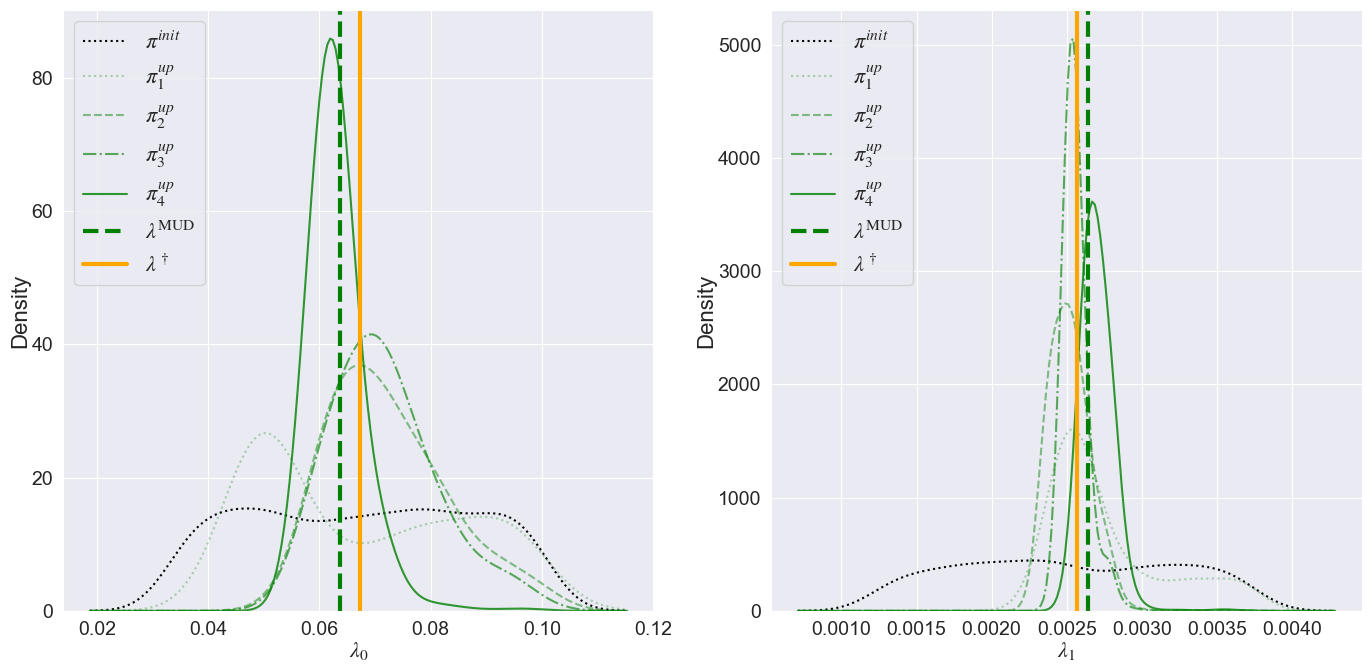

In [21]:
adcirc_density_plots(plot_1=False, plot_2=False, plot_iterative=True, plot_iterations=True)

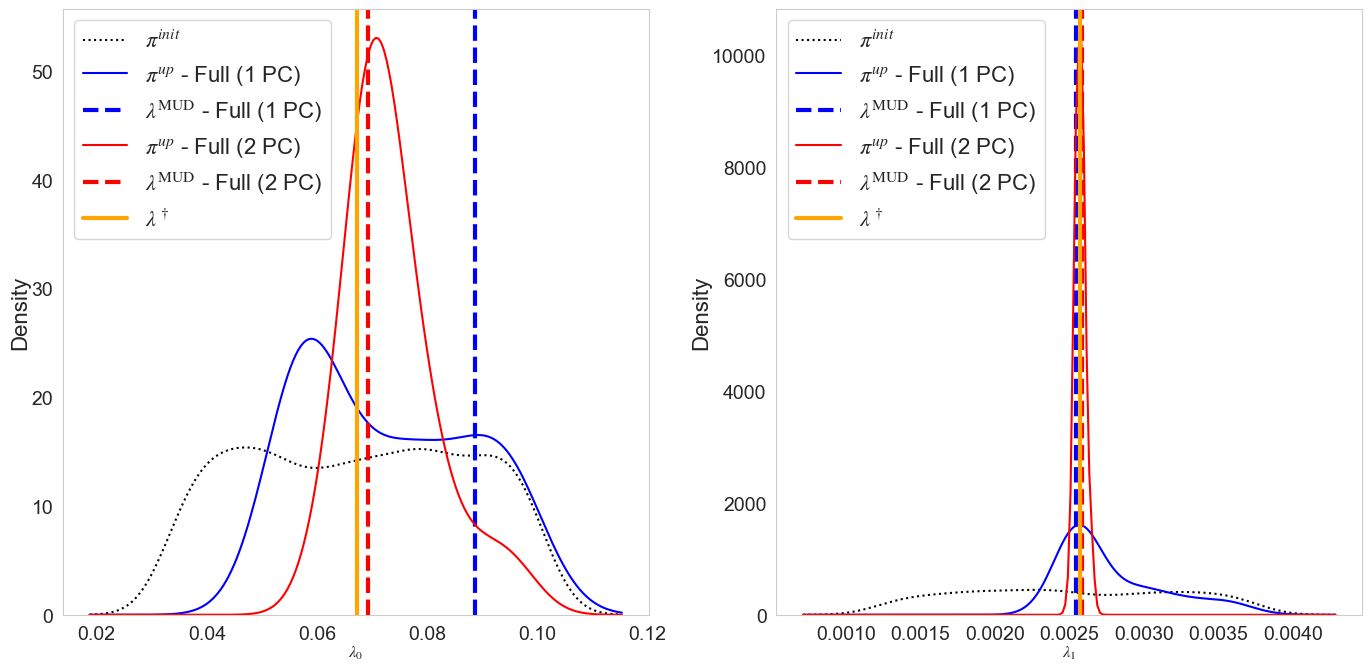

In [17]:
adcirc_density_plots(plot_1=True, plot_2=True, plot_iterative=False)

# Other figures - Learned qoi with weights over time.

Text(0.5, 1.0, 'Full 2 Component PCA Learned QoI')

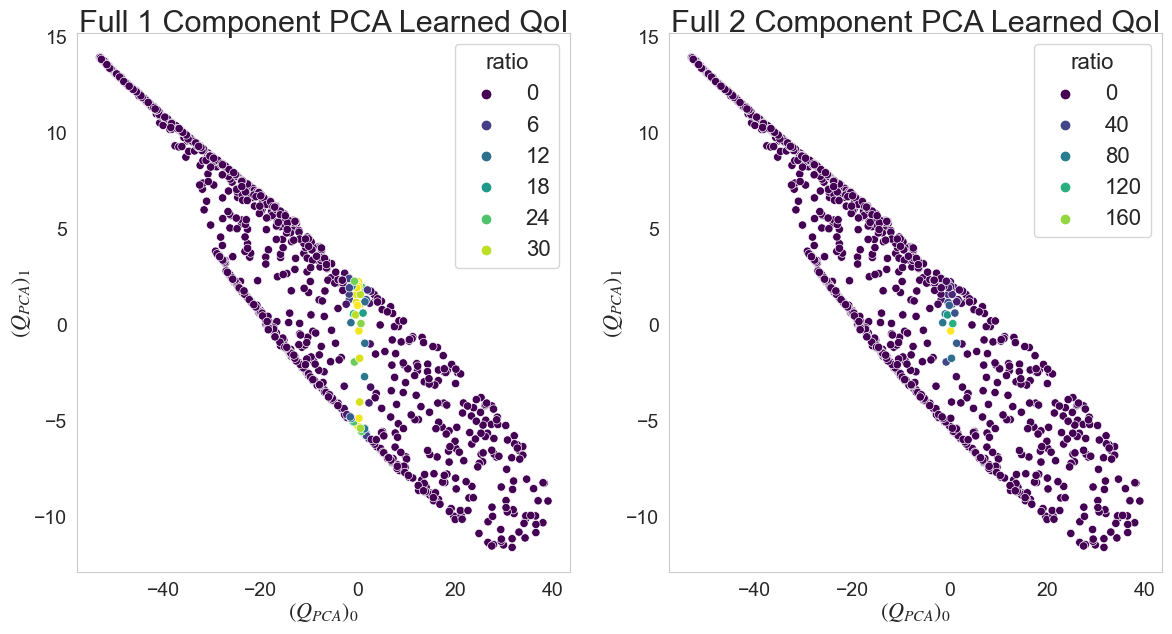

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(
    x=pca[0].state["q_pca_0"],
    y=pca[0].state["q_pca_1"],
    hue=pca[0].state["ratio"],
    palette="viridis",
    ax=ax[0],
)
ax[0].set_xlabel("$(Q_{PCA})_0$")
ax[0].set_ylabel("$(Q_{PCA})_1$")
ax[0].set_title(f"Full 1 Component PCA Learned QoI")

# fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.scatterplot(
    x=pca[1].state["q_pca_0"],
    y=pca[1].state["q_pca_1"],
    hue=pca[1].state["ratio"],
    palette="viridis",
    ax=ax[1],
)
ax[1].set_xlabel("$(Q_{PCA})_0$")
ax[1].set_ylabel("$(Q_{PCA})_1$")
ax[1].set_title(f"Full 2 Component PCA Learned QoI")

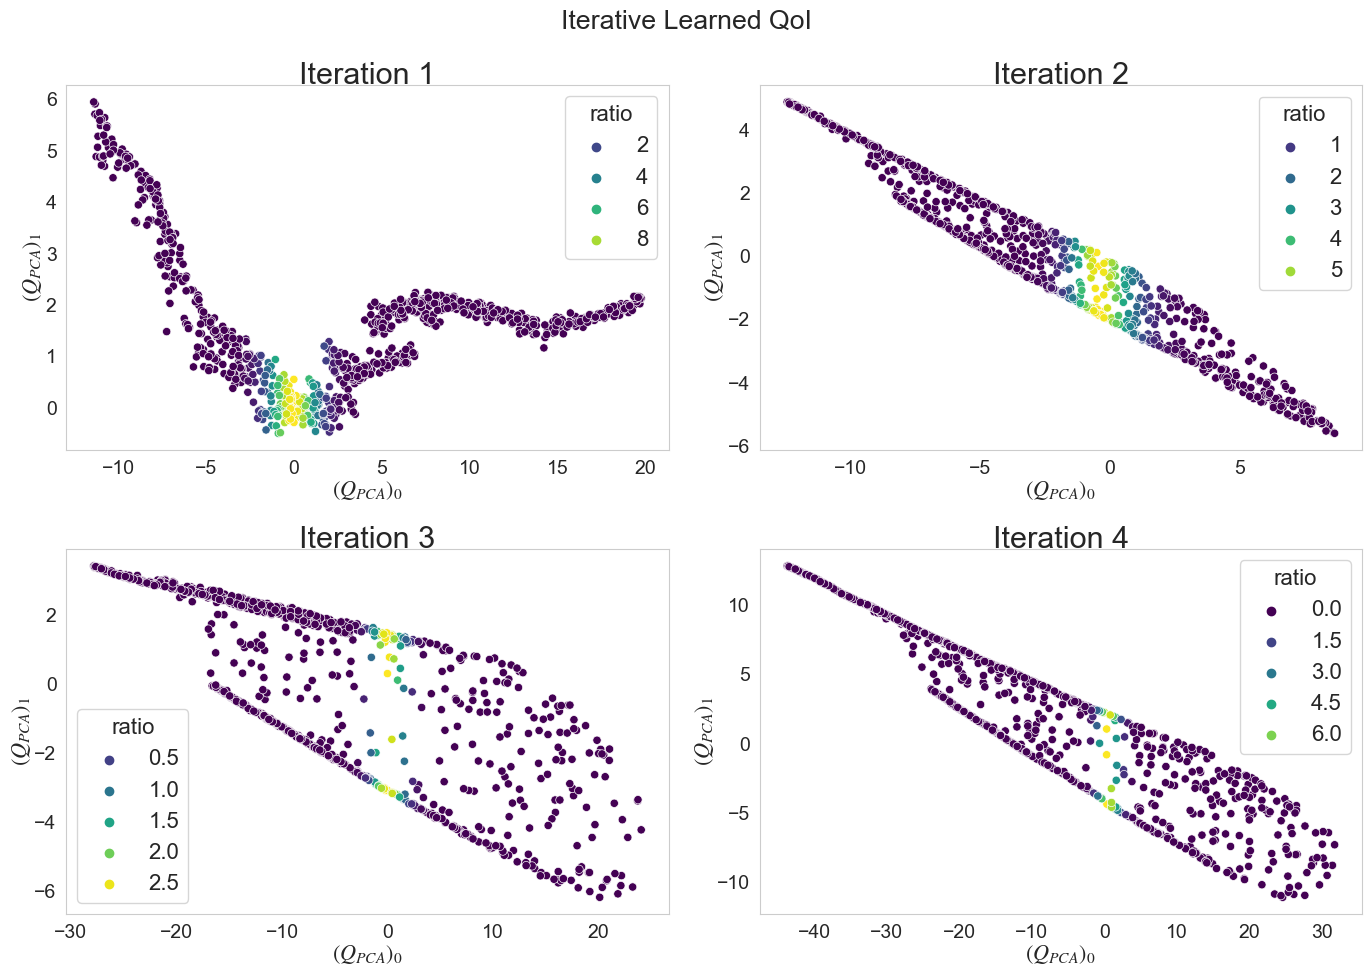

In [42]:
from pydci.utils import closest_factors

base_size = 5
grid_plot = closest_factors(n_splits)
fig, ax = plt.subplots(
    grid_plot[0],
    grid_plot[1],
    figsize=(grid_plot[0] * (base_size + 2), grid_plot[0] * base_size),
)

iteration = 0
iterations = pca_it.pca_states["iteration"].unique()
for i, ax in enumerate(ax.flat):
    df = pca_it.pca_states[pca_it.pca_states["iteration"] == iterations[i]]
    sns.scatterplot(
        x=df["q_pca_0"], y=df["q_pca_1"], hue=df["ratio"], palette="viridis", ax=ax
    )
    ax.set_xlabel("$(Q_{PCA})_0$")
    ax.set_ylabel("$(Q_{PCA})_1$")
    ax.set_title(f"Iteration {i + 1}")

fig.suptitle("Iterative Learned QoI")
fig.tight_layout()

Text(0.5, 0.98, 'Full Data Learned QoI')

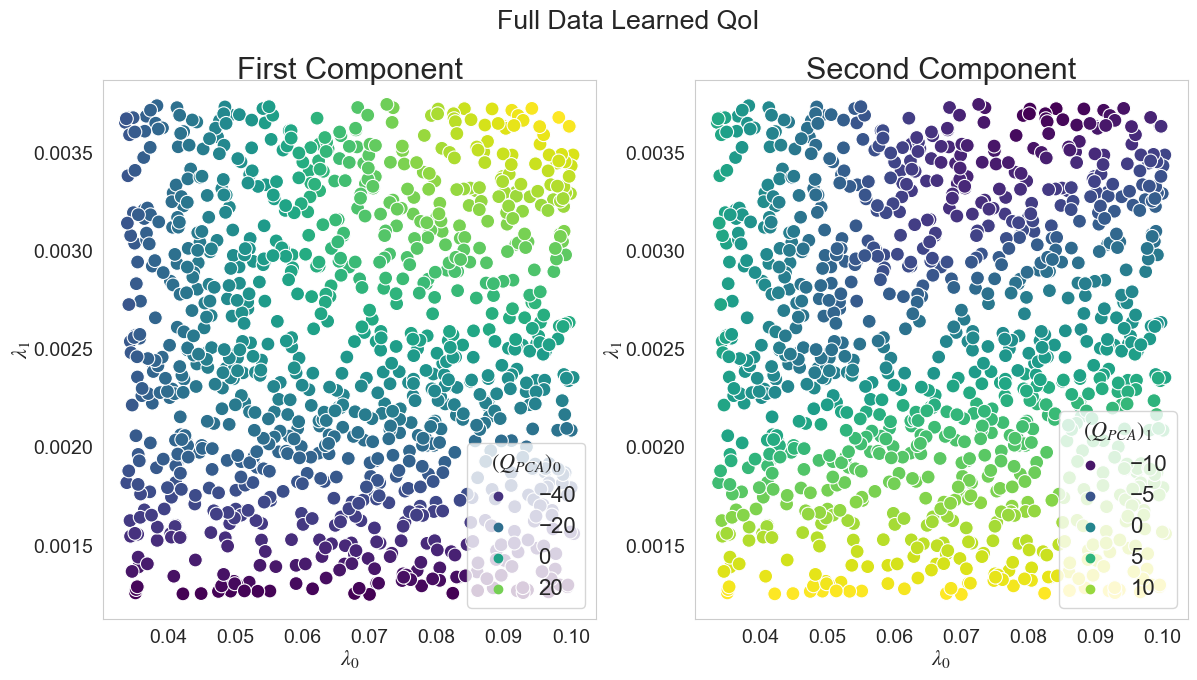

In [38]:
# TODO: Over parameter space, colored by learedn qoi
from pydci.utils import closest_factors

fig, ax = plt.subplots(
    1,
    2,
    figsize=(14, 7),
)
df = pca[0].state
sns.scatterplot(
    x=df["lam_0"], y=df["lam_1"], hue=df["q_pca_0"], palette="viridis", ax=ax[0], s=100
)
ax[0].set_xlabel("$\lambda_0$")
ax[0].set_ylabel("$\lambda_1$")
ax[0].set_title(f"First Component")
ax[0].legend(title="$(Q_{PCA})_0$", loc="lower right")

sns.scatterplot(
    x=df["lam_0"], y=df["lam_1"], hue=df["q_pca_1"], palette="viridis", ax=ax[1], s=100
)
ax[1].set_xlabel("$\lambda_0$")
ax[1].set_ylabel("$\lambda_1$")
ax[1].set_title(f"Second Component")
ax[1].legend(title="$(Q_{PCA})_1$", loc="lower right")

fig.suptitle("Full Data Learned QoI")

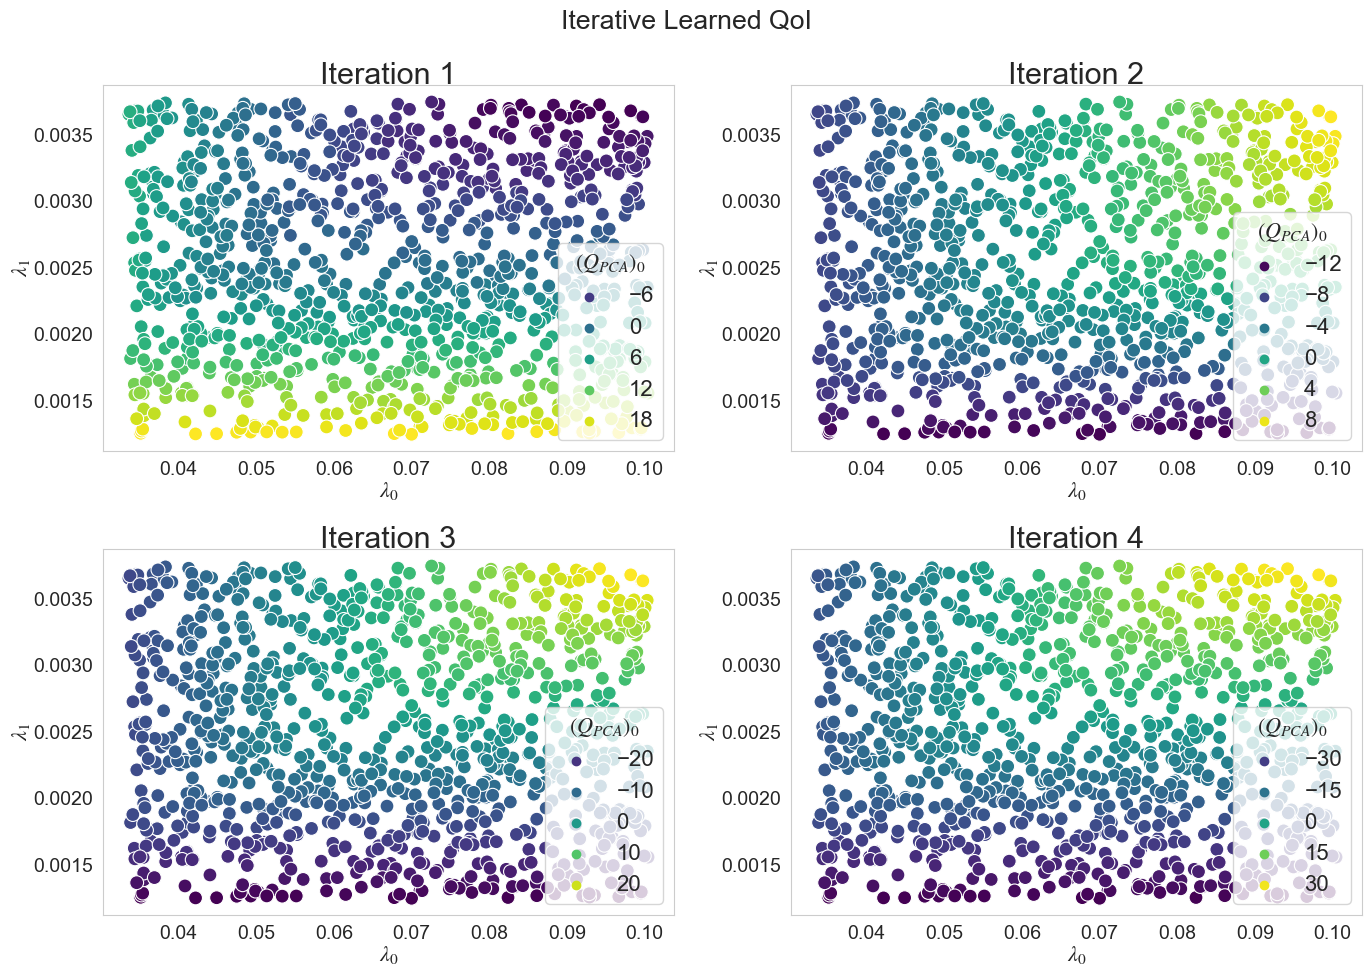

In [43]:
# TODO: Over parameter space, colored by learedn qoi
from pydci.utils import closest_factors

base_size = 5
grid_plot = closest_factors(n_splits)
fig, axs = plt.subplots(
    grid_plot[0],
    grid_plot[1],
    figsize=(grid_plot[0] * (base_size + 2), grid_plot[0] * base_size),
)

iteration = 0
iterations = pca_it.pca_states["iteration"].unique()
for i, ax in enumerate(axs.flat):
    df = pca_it.pca_states[pca_it.pca_states["iteration"] == iterations[i]]
    sns.scatterplot(
        x=df["lam_0"], y=df["lam_1"], hue=df["q_pca_0"], palette="viridis", ax=ax, s=100
    )
    ax.set_xlabel("$\lambda_0$")
    ax.set_ylabel("$\lambda_1$")
    ax.set_title(f"Iteration {i + 1}")
    ax.legend(title="$(Q_{PCA})_0$", loc="lower right")

fig.suptitle("Iterative Learned QoI")
fig.tight_layout()

# Previous

## Using 2, 5, 10 splits

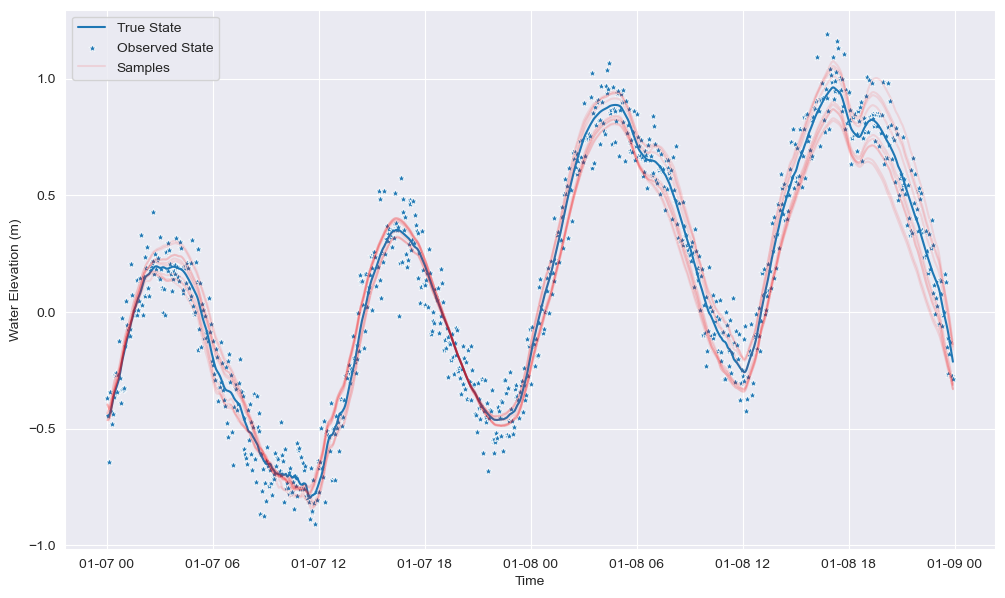

In [11]:
def split_range(mask, n_splits):
    return [range(x[0], x[-1]) for x in np.array_split(mask, n_splits)]


intervals_10 = split_range(t3_mask, 10)

plot_intervals = []
# [
#     ("10 Splits", {"color": "black", "linestyle": "-"}, intervals_10),
# ]

ad.plot_state(data_df, samples_df, t3_mask, plot_intervals=plot_intervals)
plt.savefig("adcirc_time_window_splits.png")

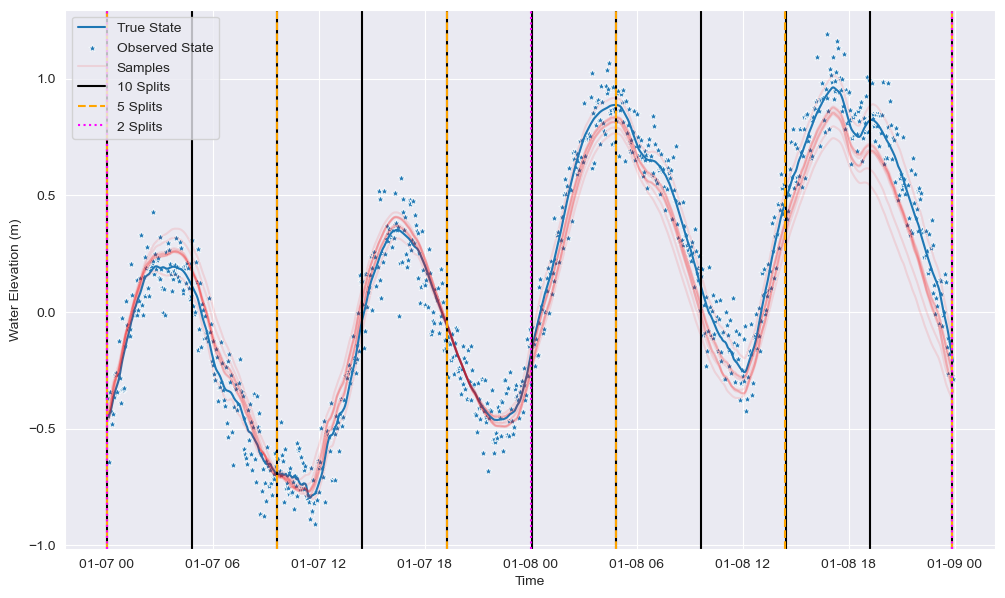

In [12]:
def split_range(mask, n_splits):
    return [range(x[0], x[-1]) for x in np.array_split(mask, n_splits)]


intervals_2 = split_range(t3_mask, 2)
intervals_5 = split_range(t3_mask, 5)
intervals_10 = split_range(t3_mask, 10)

plot_intervals = [
    ("10 Splits", {"color": "black", "linestyle": "-"}, intervals_10),
    ("5 Splits", {"color": "orange", "linestyle": "--"}, intervals_5),
    ("2 Splits", {"color": "magenta", "linestyle": ":"}, intervals_2),
]

ad.plot_state(data_df, samples_df, t3_mask, plot_intervals=plot_intervals)
plt.savefig("adcirc_time_window_splits.png")

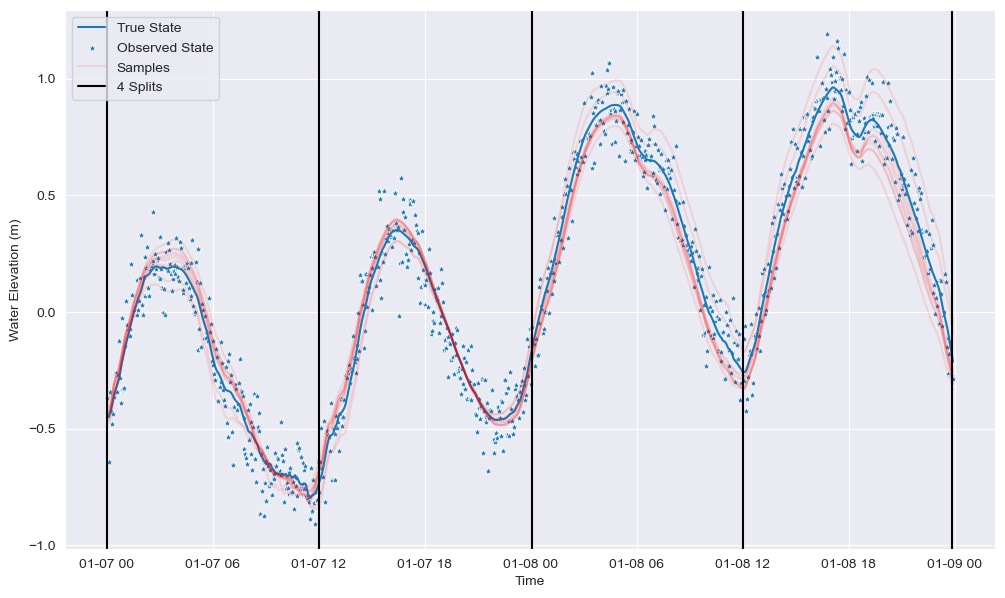

In [65]:
def split_range(mask, n_splits):
    return [range(x[0], x[-1]) for x in np.array_split(mask, n_splits)]


n_splits = 12
intervals = split_range(t3_mask, n_splits)

plot_intervals = [
    (f"10 Splits", {"color": "black", "linestyle": "-"}, intervals),
]

ad.plot_state(data_df, samples_df, t3_mask, plot_intervals=plot_intervals)
plt.savefig("adcirc_time_window_splits.png")

Forget 2 component map
Use all the data but pre-dominatly one comopnent
not clear we can find these windows
Scatter plot with contour plots 
Iteratating over prevaltent geometric structures we are learning from the data. 
as you iterate, its as if you inverted over multpiple quantities of interest. 

In [66]:
# TODO: Add skip option if e_r value outside of threshold on iterative solves.
pca_2 = PCAMUDProblem(samples_df, data_df, std_dev)
enable_log(file="test.log")
pca_2.solve_it(
    pca_mask=t3_mask, pca_splits=n_splits, pca_components=[[0]], exp_thresh=1e10
)
pca_2.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.103141  1.469817   0.080046   0.002479      403            [0]   
0  0.810056  1.174189   0.063742   0.002642      377            [0]   
0  1.066731  0.561245   0.067741   0.002538      905            [0]   
0  0.884539  1.585180   0.063742   0.002642      377            [0]   

            pca_mask  i  
0  range(2774, 3014)  0  
0  range(3014, 3254)  1  
0  range(3254, 3493)  2  
0  range(3493, 3732)  3

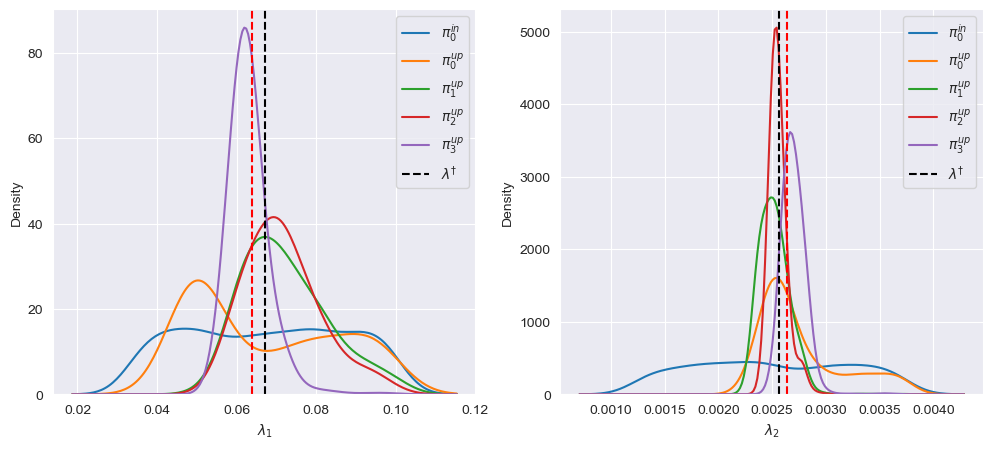

In [69]:
# use alpha to make higher iterations more solid. Seaborn to shade these?
ax = ad.plot_iterations(pca_2, plot_idxs=[0, 1, 2, 3], lam_true=lam_ref)
ax[0].axvline(pca_2.it_results.iloc[-1]["lam_MUD_0"], color="red", linestyle="--")
ax[1].axvline(pca_2.it_results.iloc[-1]["lam_MUD_1"], color="red", linestyle="--")
plt.savefig("adcirc_lam_density_2_splits.png")

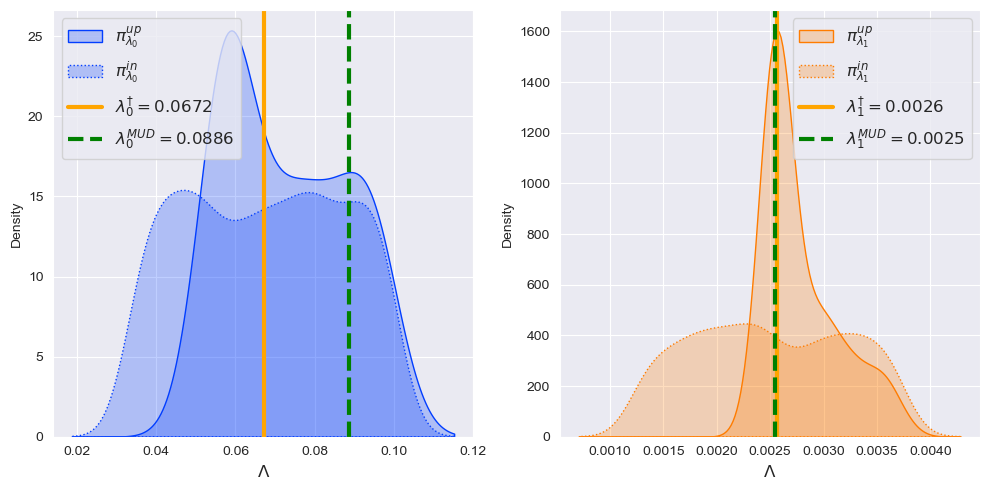

In [22]:
# TODO: Lambda_1 and lambda_2 labels for each
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
pca.plot_L(param_idx=0, lam_true=[lam_ref], ax=ax[0], plot_mud=True)
pca.plot_L(param_idx=1, lam_true=[lam_ref], ax=ax[1], plot_mud=True)
# TODO: add lambda 1 left, lambda 2 on right -> slope vs cutoff
plt.savefig("adcirc_lam_density_no_split.png")

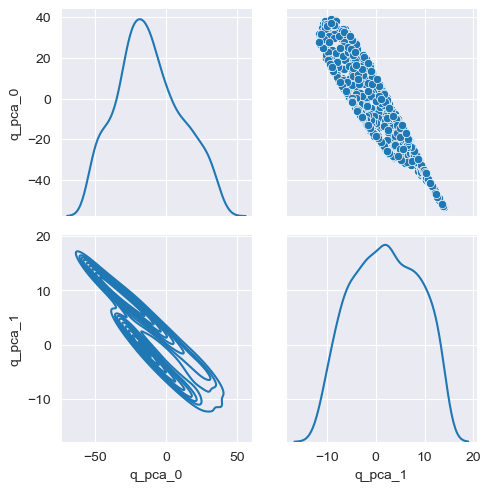

In [70]:
# TODO: learned qoi plot, with colored values, for each iteration, see how geometric structure changes.
pca.learned_qoi_plot()

In [42]:
# TODO: maybe joint plot for 1 compoenent for illustrative purposes?

0       1.563301e-42
1       8.636916e+00
2      1.440889e-294
3       0.000000e+00
4       9.567846e-19
           ...      
993     2.008138e-04
994     9.387034e-10
995     2.970054e-19
996    1.842983e-143
997     5.624869e+01
Name: ratio, Length: 998, dtype: float64

In [15]:
pca_5 = PCAMUDProblem(samples_df, data_df, std_dev)
pca_5.solve_it(pca_mask=t3_mask, pca_splits=5, pca_components=[[0]], exp_thresh=0.9)
pca_5.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.104773  2.264500   0.050972   0.002684      683            [0]   
0  0.361275  1.889861   0.061655   0.002603       44            [0]   
0  1.065392  0.590528   0.061655   0.002603       44            [0]   
0  1.086996  0.195365   0.061655   0.002603       44            [0]   
0  1.674595  0.854687   0.061655   0.002603       44            [0]   

            pca_mask  i  
0  range(2774, 2966)  0  
0  range(2966, 3158)  1  
0  range(3158, 3350)  2  
0  range(3350, 3541)  3  
0  range(3541, 3732)  4

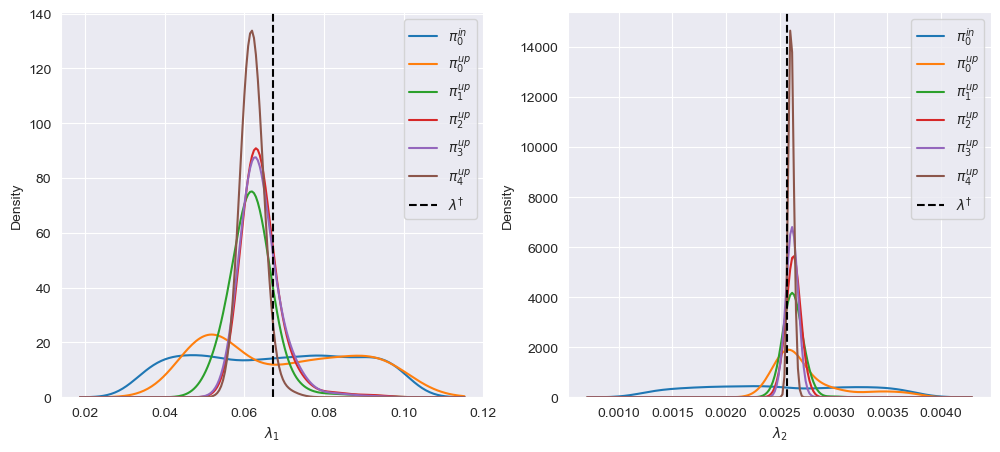

In [16]:
ad.plot_iterations(pca_5, plot_idxs=range(5), lam_true=lam_ref)
plt.savefig("adcirc_lam_density_5_splits.png")

In [17]:
pca_10 = PCAMUDProblem(samples_df, data_df, std_dev)
pca_10.solve_it(pca_mask=t3_mask, pca_splits=10, pca_components=[[0]], exp_thresh=0.9)
pca_10.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0  1.142913  1.612580   0.046838   0.002814      545            [0]   
0  0.933284  1.134277   0.087825   0.002599       12            [0]   
0  0.894915  1.477237   0.063742   0.002642      377            [0]   
0  0.593402  1.387461   0.063742   0.002642      377            [0]   
0  0.785968  0.545587   0.063742   0.002642      377            [0]   
0  0.697563  0.632482   0.063742   0.002642      377            [0]   
0  0.875192  0.699522   0.071724   0.002557      877            [0]   
0  1.422071  0.363669   0.071724   0.002557      877            [0]   
0  0.927918  2.217533   0.063742   0.002642      377            [0]   
0  0.319008  0.777908   0.063742   0.002642      377            [0]   

            pca_mask  i  
0  range(2774, 2870)  0  
0  range(2870, 2966)  1  
0  range(2966, 3062)  2  
0  range(3062, 3158)  3  
0  range(3158, 3254)  4  
0  range(3254, 3350)  5  
0  range(3350, 3446)  6  
0  range(3446, 3542)  7  
0  range(3542, 3637)  8  
0  range(3637, 3732)  9

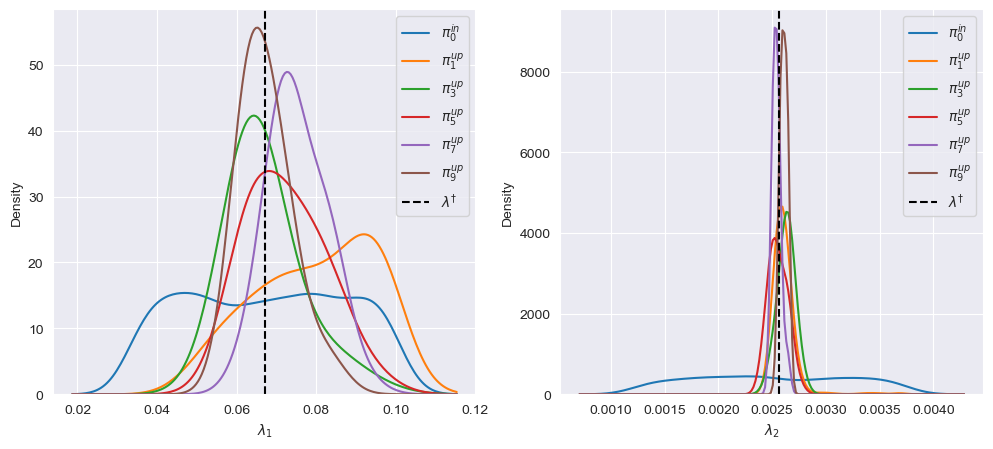

In [18]:
ad.plot_iterations(pca_10, plot_idxs=range(1, 10, 2), lam_true=lam_ref)
plt.savefig("adcirc_lam_density_10_splits.png")

In [19]:
pca_100 = PCAMUDProblem(samples_df, data_df, std_dev)
pca_100.solve_it(
    pca_mask=t3_mask, pca_splits=100, pca_components=[[0]], exp_thresh=1e10
)
pca_100.it_results

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0   0.951521  0.662131   0.045694   0.002448      741            [0]   
0   0.468468  0.053657   0.043783   0.002889      368            [0]   
0   0.642947  2.647861   0.037988   0.002950      893            [0]   
0   0.878076  0.576571   0.074917   0.003509      352            [0]   
0   0.987873  0.321546   0.074917   0.003509      352            [0]   
..       ...       ...        ...        ...      ...            ...   
0   0.195209  6.532811   0.063742   0.002642      377            [0]   
0   1.047842  0.448156   0.063742   0.002642      377            [0]   
0   0.527292  1.151371   0.063742   0.002642      377            [0]   
0   0.907591  0.102806   0.063742   0.002642      377            [0]   
0   0.649182  1.670267   0.058377   0.002558      442            [0]   

             pca_mask   i  
0   range(2774, 2784)   0  
0   range(2784, 2794)   1  
0   range(2794, 2804)   2  
0   range(2804, 2814)   3  
0   range(2814, 2824)   4  
..                ...  ..  
0   range(3687, 3696)  95  
0   range(3696, 3705)  96  
0   range(3705, 3714)  97  
0   range(3714, 3723)  98  
0   range(3723, 3732)  99  

[100 rows x 8 columns]

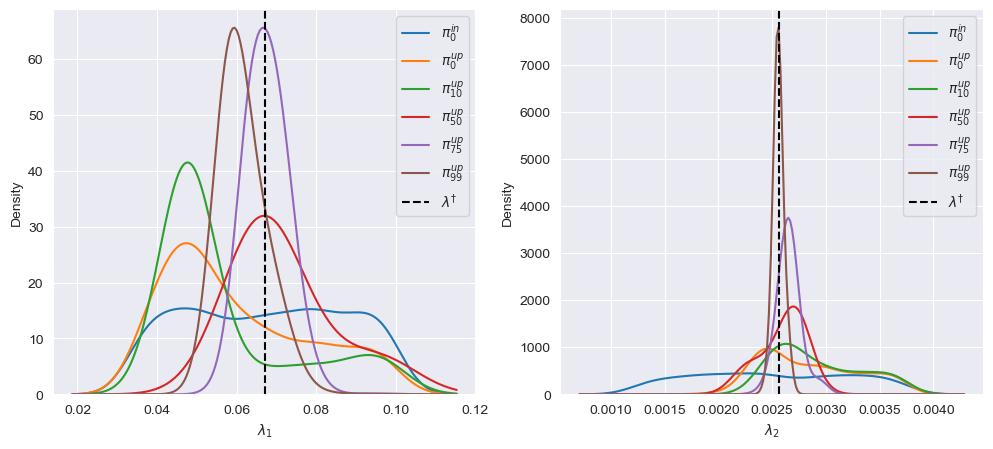

In [20]:
ad.plot_iterations(pca_100, plot_idxs=[0, 10, 50, 75, 99], lam_true=lam_ref)
plt.savefig("adcirc_lam_density_100_splits.png")

In [21]:
pca_2.pca_states[pca_2.pca_states["iteration"] == 0]

lam_0     lam_1    q_pca_0    q_pca_1  weight        pi_in  \
0    0.093865  0.002217   7.909317   5.704441     1.0  5357.772225   
1    0.073952  0.002513  -0.787637   0.118838     1.0  5591.551809   
2    0.059847  0.001664  28.591925   9.556295     1.0  5085.417496   
3    0.040349  0.001561  33.394344  10.132784     1.0  4389.765318   
4    0.049240  0.003691   5.707350  -4.533921     1.0  3505.439493   
..        ...       ...        ...        ...     ...          ...   
993  0.055597  0.002976   0.319295  -5.482137     1.0  5648.584802   
994  0.060459  0.002982  -2.972502  -5.585434     1.0  5394.706265   
995  0.049044  0.002823   5.648689  -4.632117     1.0  6240.395680   
996  0.036092  0.002299  20.132598   0.698586     1.0  4316.564378   
997  0.076454  0.002550  -2.504337  -0.264256     1.0  5714.891496   

            pi_obs     pi_pr          ratio          pi_up  iteration  \
0     1.039358e-14  0.019639   5.292198e-13   2.835439e-09          0   
1     2.925485e-01  0.016733   1.748358e+01   9.776033e+04          0   
2    1.211823e-178  0.010957  1.106022e-176  5.624584e-173          0   
3    2.768045e-243  0.008791  3.148753e-241  1.382229e-237          0   
4     3.369691e-08  0.018846   1.787991e-06   6.267696e-03          0   
..             ...       ...            ...            ...        ...   
993   3.791159e-01  0.017084   2.219170e+01   1.253517e+05          0   
994   4.811134e-03  0.015936   3.019080e-01   1.628705e+03          0   
995   4.701591e-08  0.018825   2.497544e-06   1.558566e-02          0   
996   3.858885e-89  0.018540   2.081410e-87   8.984542e-84          0   
997   1.733911e-02  0.016121   1.075544e+00   6.146619e+03          0   

    pca_components           pca_mask  
0              [0]  range(2774, 3253)  
1              [0]  range(2774, 3253)  
2              [0]  range(2774, 3253)  
3              [0]  range(2774, 3253)  
4              [0]  range(2774, 3253)  
..             ...                ...  
993            [0]  range(2774, 3253)  
994            [0]  range(2774, 3253)  
995            [0]  range(2774, 3253)  
996            [0]  range(2774, 3253)  
997            [0]  range(2774, 3253)  

[998 rows x 13 columns]

In [22]:
pca.state

weight        pi_in     pi_pr         pi_obs          ratio  \
0       1.0  5357.772225  0.000627  7.709833e-169  1.230470e-165   
1       1.0  5591.551809  0.000439   6.411888e-05   1.459162e-01   
2       1.0  5085.417496  0.000903   0.000000e+00   0.000000e+00   
3       1.0  4389.765318  0.000894   0.000000e+00   0.000000e+00   
4       1.0  3505.439493  0.000743   4.028429e-74   5.421755e-71   
..      ...          ...       ...            ...            ...   
993     1.0  5648.584802  0.000608   1.223744e-21   2.012945e-18   
994     1.0  5394.706265  0.000504   1.774485e-46   3.523017e-43   
995     1.0  6240.395680  0.000742   4.494952e-76   6.058192e-73   
996     1.0  4316.564378  0.000610   0.000000e+00   0.000000e+00   
997     1.0  5714.891496  0.000427   1.010162e-02   2.363704e+01   

             pi_up   q_lam_0   q_lam_1   q_lam_2   q_lam_3  ...  q_lam_6127  \
0    6.592578e-162 -0.098529 -0.098187 -0.097603 -0.096297  ...   -0.070415   
1     8.158977e+02 -0.149888 -0.149366 -0.148671 -0.147051  ...   -0.134574   
2     0.000000e+00  0.009024  0.009842  0.010425  0.010887  ...    0.049343   
3     0.000000e+00  0.030676  0.031019  0.031184  0.031288  ...    0.070816   
4     1.900563e-67 -0.115084 -0.112887 -0.110688 -0.107900  ...   -0.095033   
..             ...       ...       ...       ...       ...  ...         ...   
993   1.137029e-14 -0.150908 -0.148516 -0.146042 -0.142579  ...   -0.138285   
994   1.900564e-39 -0.180696 -0.177620 -0.174413 -0.170387  ...   -0.170856   
995   3.780551e-69 -0.113886 -0.111741 -0.109616 -0.106887  ...   -0.093631   
996   0.000000e+00 -0.036399 -0.034519 -0.032745 -0.030712  ...   -0.003762   
997   1.350831e+05 -0.157459 -0.156550 -0.155543 -0.154001  ...   -0.142370   

     q_lam_6128  q_lam_6129  q_lam_6130  q_lam_6131  q_lam_6132     lam_0  \
0     -0.081188   -0.092421   -0.103996   -0.115751   -0.127697  0.093865   
1     -0.145131   -0.156176   -0.167739   -0.179283   -0.191110  0.073952   
2      0.038682    0.027550    0.016001    0.004138   -0.007969  0.059847   
3      0.060206    0.049101    0.037551    0.025542    0.013429  0.040349   
4     -0.106318   -0.118181   -0.130594   -0.143590   -0.156585  0.049240   
..          ...         ...         ...         ...         ...       ...   
993   -0.149806   -0.161832   -0.174512   -0.187535   -0.200639  0.055597   
994   -0.183221   -0.195793   -0.208266   -0.221700   -0.235379  0.060459   
995   -0.104994   -0.116927   -0.129399   -0.142426   -0.155378  0.049044   
996   -0.015099   -0.026851   -0.038969   -0.051372   -0.064029  0.036092   
997   -0.153046   -0.163931   -0.175075   -0.186152   -0.198172  0.076454   

        lam_1    q_pca_0    q_pca_1  
0    0.002217 -25.448799  11.084749  
1    0.002513  -2.708894   2.880223  
2    0.001664 -70.309287  20.117384  
3    0.001561 -79.149645  21.634404  
4    0.003691 -17.436286  -5.504181  
..        ...        ...        ...  
993  0.002976  -2.325126  -9.339314  
994  0.002982   8.362341 -11.708386  
995  0.002823 -17.706177  -5.459172  
996  0.002299 -50.639659   4.983671  
997  0.002550   0.625560   2.263413  

[998 rows x 6143 columns]

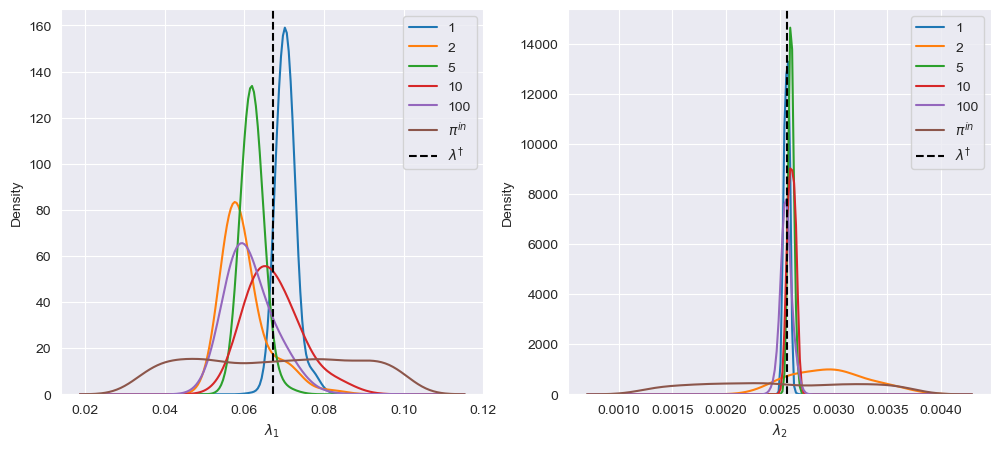

In [23]:
def compare_final_solutions(probs, lam_true=None):
    """
    Plot updated marginal distributions for each parameter for each iteration.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    for prob in probs:
        n_its = 1
        if "it_results" in dir(prob):
            n_its = len(prob.it_results)
        label = f"{n_its}"
        sns.kdeplot(
            prob.state,
            x="lam_0",
            weights=prob.state["weight"] * prob.state["ratio"],
            ax=ax[0],
            label=label,
        )
        sns.kdeplot(
            prob.state,
            x="lam_1",
            weights=prob.state["weight"] * prob.state["ratio"],
            ax=ax[1],
            label=label,
        )

    label = f"$\pi^{{in}}$"
    sns.kdeplot(probs[0].state, x="lam_0", ax=ax[0], label=label)
    sns.kdeplot(probs[0].state, x="lam_1", ax=ax[1], label=label)
    if lam_true is not None:
        ax[0].axvline(
            lam_true[0], color="k", linestyle="--", label=f"$\lambda^{{\dagger}}$"
        )
        ax[1].axvline(
            lam_true[1], color="k", linestyle="--", label=f"$\lambda^{{\dagger}}$"
        )

    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel("$\lambda_1$")
    ax[1].set_xlabel("$\lambda_2$")

    return ax


ax = compare_final_solutions([pca, pca_2, pca_5, pca_10, pca_100], lam_true=lam_ref)
plt.savefig("adcirc_lam_split_pi_up_comparison.png")

## Comparing Sequential vs. Fixed Over Time

We will compare the results of the sequential inversion with the fixed inversion over time.
We will use the same number of intervals for both cases.

In [24]:
NS = 10
NT = 20
NSAMPLES = 999

args = {
    "ds": full_ds,
    "mask": t3_mask,
    "num_splits": NS,
    "std_dev": std_dev,
    "num_trials": NT,
    "num_samples": NSAMPLES,
    "pca_components": [[0]],
}

disable_log()
results = []
results.append(ad.iterative_trials(**args))
results.append(ad.fixed_trials(**args))
args["pca_components"] = [[0, 1]]
results.append(ad.fixed_trials(**args))

Iterative (nc = 1) |████████████████████| 20/20 [100%] in 18.7s (1.04/s)        
Full (nc = 1) |████████████████████| 200/200 [100%] in 45.7s (4.38/s)           
Full (nc = 2) |████████████████████| 200/200 [100%] in 46.2s (4.33/s)           |██████▋             | ▃▅▇ 66/200 [33%] in 15s (~31s, 4.3/s) |██████████████████▌ | ▃▁▃ 185/200 [92%] in 43s (~4s, 4.3/s) 


In [25]:
results[0]

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0   1.018033  1.570944   0.050259   0.002748       25            [0]   
0   1.018033  1.570944   0.050259   0.002748       25            [0]   
0   1.034232  0.595334   0.094254   0.002605      990            [0]   
0   0.871629  0.909357   0.063742   0.002642      387            [0]   
0   0.695872  1.637198   0.063742   0.002642      387            [0]   
..       ...       ...        ...        ...      ...            ...   
0   0.924719  0.620186   0.094254   0.002605      425            [0]   
0   1.261432  0.877586   0.094254   0.002605      425            [0]   
0   0.457128  2.676283   0.071724   0.002557      720            [0]   
0   0.946102  0.263112   0.069999   0.002698      739            [0]   
0   0.997444  0.833755   0.071724   0.002557      720            [0]   

             pca_mask  i    l2_err  state_err                  ts  max_it  \
0   range(2774, 2870)  0  0.016985   5.862131 2018-01-07 00:03:00       9   
0   range(2774, 2870)  1  0.016985   5.862131 2018-01-07 04:51:00       9   
0   range(2870, 2966)  2  0.027011   4.132853 2018-01-07 09:39:00       9   
0   range(2966, 3062)  3  0.003502   4.124841 2018-01-07 14:27:00       9   
0   range(3062, 3158)  4  0.003502   4.124841 2018-01-07 19:15:00       9   
..                ... ..       ...        ...                 ...     ...   
0   range(2966, 3062)  3  0.027011   4.259338 2018-01-07 14:27:00       7   
0   range(3062, 3158)  4  0.027011   4.259338 2018-01-07 19:15:00       7   
0   range(3158, 3254)  5  0.004481   3.989328 2018-01-08 00:03:00       7   
0   range(3254, 3350)  6  0.002759   4.865866 2018-01-08 04:51:00       7   
0   range(3350, 3446)  7  0.004481   3.989328 2018-01-08 09:39:00       7   

    num_iters  trial                    type  
0          10      0  iterative ($\ell$ = 1)  
0          10      0  iterative ($\ell$ = 1)  
0          10      0  iterative ($\ell$ = 1)  
0          10      0  iterative ($\ell$ = 1)  
0          10      0  iterative ($\ell$ = 1)  
..        ...    ...                     ...  
0          10     19  iterative ($\ell$ = 1)  
0          10     19  iterative ($\ell$ = 1)  
0          10     19  iterative ($\ell$ = 1)  
0          10     19  iterative ($\ell$ = 1)  
0          10     19  iterative ($\ell$ = 1)  

[194 rows x 15 columns]

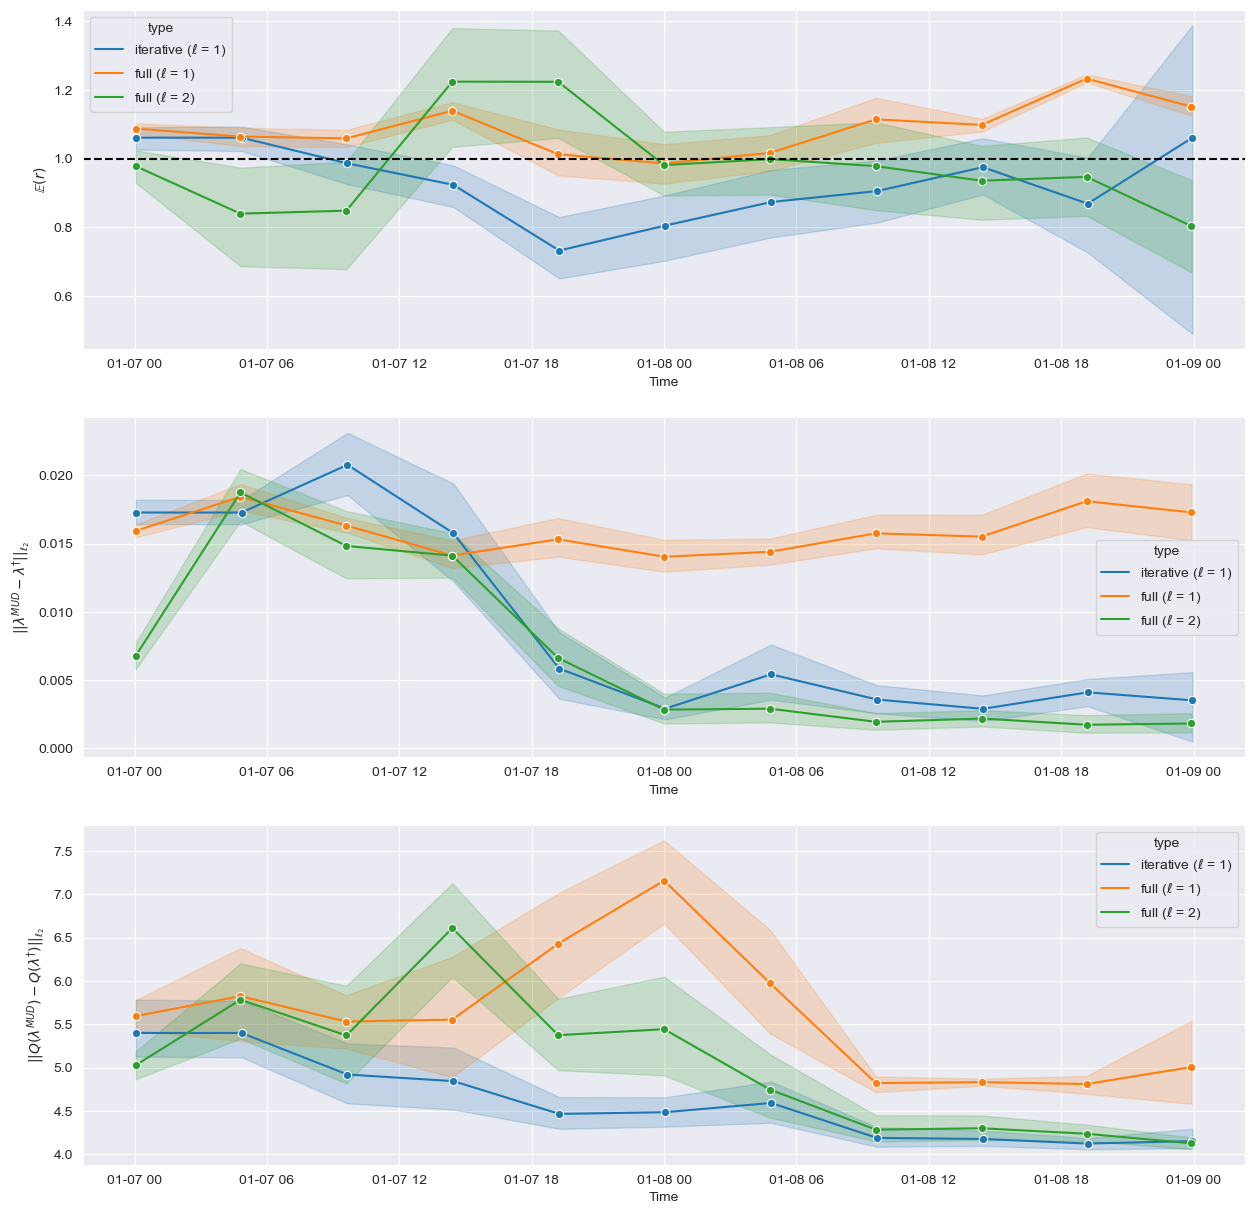

In [26]:
plot_args = {"markers": True, "hue": "type", "marker": "o"}
ax = ad.plot_metric(
    results,
    metric=["e_r", "l2_err", "state_err"],
    figsize=(15, 15),
    lineplot_kwargs=plot_args,
)
# TODO: Q  error -> error in timeseries
plt.savefig("adcirc_trials.png")

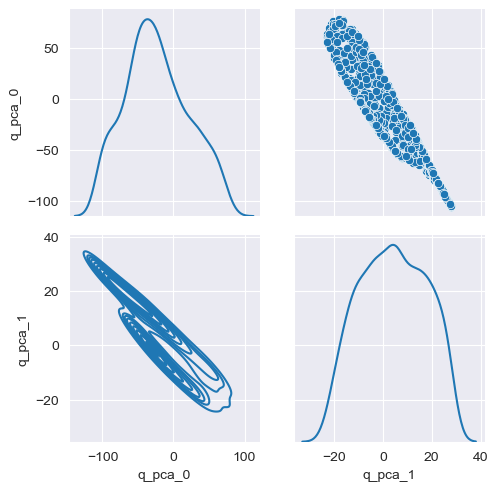

In [29]:
pca.learned_qoi_plot()

## Comparing fixed vs iterative - 4 Splits

In [27]:
NS = 4
NT = 20
NSAMPLES = 999

args = {
    "ds": full_ds,
    "mask": t3_mask,
    "num_splits": NS,
    "std_dev": std_dev,
    "num_trials": NT,
    "num_samples": NSAMPLES,
    "pca_components": [[0]],
}

disable_log()
results = []
results.append(ad.iterative_trials(**args))
results.append(ad.fixed_trials(**args))
args["pca_components"] = [[0, 1]]
results.append(ad.fixed_trials(**args))

Iterative (nc = 1) |████████████████████| 20/20 [100%] in 15.0s (1.31/s)        
Full (nc = 1) |████████████████████| 80/80 [100%] in 25.6s (3.12/s)             
Full (nc = 2) |████████████████████| 80/80 [100%] in 21.6s (3.69/s)             


In [28]:
results[0]

e_r        kl  lam_MUD_0  lam_MUD_1  MUD_idx pca_components  \
0   1.091729  1.411922   0.080895   0.002426      730            [0]   
0   1.091729  1.411922   0.080895   0.002426      730            [0]   
0   0.748889  1.226957   0.059484   0.002453       49            [0]   
0   0.785700  1.962893   0.063742   0.002642      905            [0]   
0   0.879615  0.955795   0.063742   0.002642      905            [0]   
..       ...       ...        ...        ...      ...            ...   
0   1.100557  1.478616   0.080046   0.002479      897            [0]   
0   1.100557  1.478616   0.080046   0.002479      897            [0]   
0   0.697280  1.146100   0.063742   0.002642      281            [0]   
0   0.986778  0.764475   0.061655   0.002603      689            [0]   
0   0.897834  0.808567   0.061655   0.002603      689            [0]   

             pca_mask  i    l2_err  state_err                  ts  max_it  \
0   range(2774, 3014)  0  0.013653  10.046136 2018-01-07 00:03:00       4   
0   range(2774, 3014)  1  0.013653  10.046136 2018-01-07 12:03:00       4   
0   range(3014, 3254)  2  0.007760   8.417526 2018-01-08 00:03:00       4   
0   range(3254, 3493)  3  0.003502   7.842160 2018-01-08 12:00:00       4   
0   range(3493, 3732)  4  0.003502   7.842160 2018-01-08 23:57:00       4   
..                ... ..       ...        ...                 ...     ...   
0   range(2774, 3014)  0  0.012803   8.377340 2018-01-07 00:03:00       4   
0   range(2774, 3014)  1  0.012803   8.377340 2018-01-07 12:03:00       4   
0   range(3014, 3254)  2  0.003502   8.074765 2018-01-08 00:03:00       4   
0   range(3254, 3493)  3  0.005588   8.052574 2018-01-08 12:00:00       4   
0   range(3493, 3732)  4  0.005588   8.052574 2018-01-08 23:57:00       4   

    num_iters  trial                    type  
0           4      0  iterative ($\ell$ = 1)  
0           4      0  iterative ($\ell$ = 1)  
0           4      0  iterative ($\ell$ = 1)  
0           4      0  iterative ($\ell$ = 1)  
0           4      0  iterative ($\ell$ = 1)  
..        ...    ...                     ...  
0           4     19  iterative ($\ell$ = 1)  
0           4     19  iterative ($\ell$ = 1)  
0           4     19  iterative ($\ell$ = 1)  
0           4     19  iterative ($\ell$ = 1)  
0           4     19  iterative ($\ell$ = 1)  

[100 rows x 15 columns]

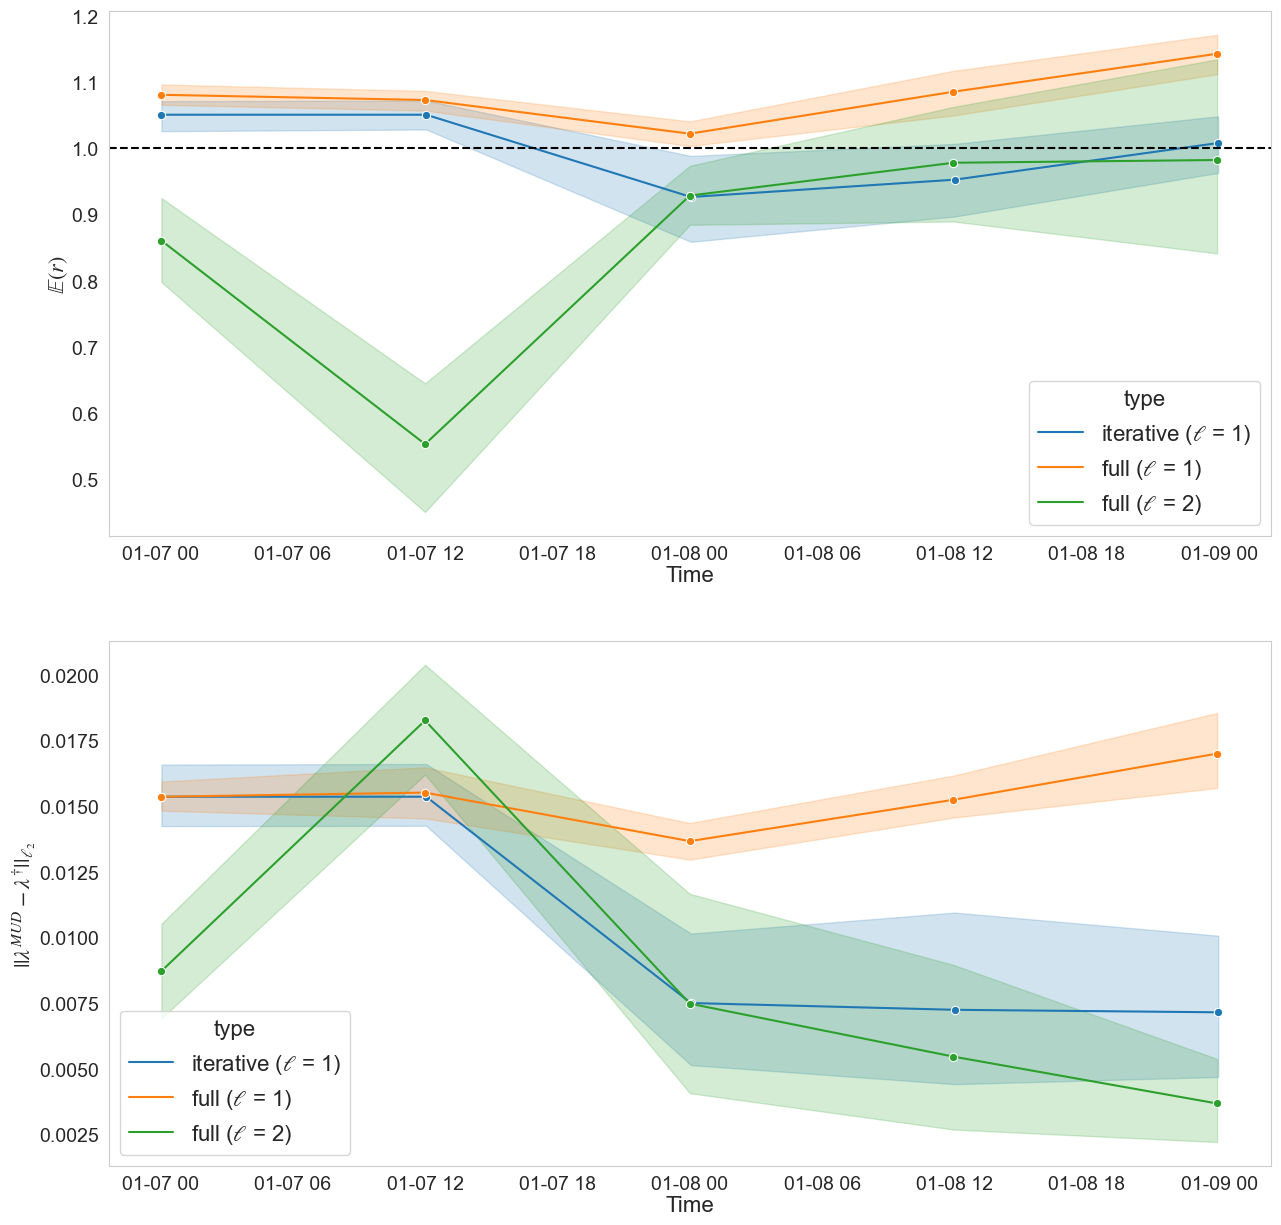

In [31]:
plot_args = {"markers": True, "hue": "type", "marker": "o"}
ax = ad.plot_metric(
    results,
    metric=["e_r", "l2_err"],  # , "state_err"],
    figsize=(15, 15),
    lineplot_kwargs=plot_args,
)
# TODO: Q  error -> error in timeseries
plt.savefig("adcirc_trials.png")

## Using Less Samples

In [32]:
disable_log()

NSAMPLES = 100
args = {
    "ds": full_ds,
    "mask": t3_mask,
    "num_splits": NS,
    "std_dev": std_dev,
    "num_trials": NT,
    "num_samples": NSAMPLES,
    "pca_components": [[0]],
}

results_100 = []
results_100.append(ad.iterative_trials(**args))
results_100.append(ad.fixed_trials(**args))
args["pca_components"] = [[0, 1]]
results_100.append(ad.fixed_trials(**args))

Iterative (nc = 1) |████████████████████| 20/20 [100%] in 7.6s (2.58/s)         
Full (nc = 1) |████████████████████| 200/200 [100%] in 38.6s (5.20/s)           |████████▋           | ▄▆█ 86/200 [43%] in 15s (~20s, 5.6/s) |██████████████▏     | ▁▃▅ 141/200 [70%] in 26s (~11s, 5.4/s) 
Full (nc = 2) |████████████████████| 200/200 [100%] in 36.7s (5.43/s)           


In [17]:
plot_args = {"markers": True, "hue": "type", "marker": "o"}
ax = ad.plot_metric(
    results_100,
    metric=["e_r", "l2_err", "state_err"],
    figsize=(15, 15),
    lineplot_kwargs=plot_args,
)

NameError: name 'results_100' is not defined

# Old Stuff


In [ ]:
import pdb
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydci import PCAMUDProblem
from pydci.utils import add_noise, put_df

path = str(Path.home() / "NHERI-Published/PRJ-3492/si-inlet-full-ds.pickle")
path = str(Path.cwd() / "si-inlet-full-ds.pickle")

with open(path, "rb") as fp:
    full_ds = pickle.load(fp)

all_lam = np.vstack([full_ds["lam"], lam_ref.reshape(1, -1)])
all_data = np.vstack([full_ds["data"], full_ds["true_vals"].reshape(1, -1)])
all_lam.shape, all_data.shape


def plot_state(data, samples=None, mask=None, plot_intervals=None):
    """
    Plots the true state, observed state, and samples of the state, with
    state being the observed water level at the recording station in the grid.

    Parameters
    ----------
    samples : pd.DataFrame
        Samples from the initial distribution of parameter samples, and their
        associated states, that is water levels.
    mask : list
        List of indices to plot from the data.
    plot_intervals : list
        List of tuples, where each tuple is a name, a dictionary of arguments
        to to pass to ax.axvline, and a list of intervals to plot, intervals
        being a tuploe of tuples of start and end indices.

    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))

    mask = data.index.values if mask is None else mask
    sns.lineplot(data.iloc[mask], x="ts", y="q_lam_true_0", label="True State", ax=ax)
    sns.scatterplot(
        data.iloc[mask],
        x="ts",
        y="q_lam_obs_0",
        marker="*",
        label="Observed State",
        ax=ax,
    )

    if samples is not None:
        cols = [
            c
            for c in samples.columns
            if c.startswith("q_lam_") and int(c.split("_")[-1]) in mask
        ]
        num_plot = 10
        for idx, i in enumerate(
            np.random.choice(range(len(samples)), num_plot, replace=False)
        ):
            to_plot = pd.DataFrame(
                samples.iloc[[i]][cols].values.T, columns=[f"q_lam_s={i}"]
            )
            to_plot["ts"] = data.iloc[mask]["ts"].values
            label = None if idx != num_plot - 1 else "Samples"
            sns.lineplot(
                to_plot,
                x="ts",
                y=f"q_lam_s={i}",
                ax=ax,
                color="r",
                alpha=0.1,
                label=label,
            )

    plot_intervals = [] if plot_intervals is None else plot_intervals
    for name, args, intervals in plot_intervals:
        for interval in intervals:
            ax.axvline(data["ts"][interval[0]], **args)
        args["label"] = name
        ax.axvline(data["ts"][intervals[-1][-1]], **args)

    # ax.set_title('Time Window 3')
    # ax.set_title(f'lam_true = {data["lam_true_0"].values[0]}, {data["lam_true_1"].values[0]}')
    ax.set_ylabel("Water Elevation (m)")
    ax.set_xlabel("Time")
    ax.legend()

    return ax


def plot_iterations(prob, max_plot=10, plot_idxs=None, lam_true=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    if plot_idxs is None:
        num_its = prob.pca_states["iteration"].max()
        if num_its > max_plot:
            plot_idxs = list(range(0, num_its, int(num_its / max_plot)))
            if (num_its - 1) not in plot_idxs:
                plot_idxs += [num_its - 1]
        else:
            plot_idxs = range(0, num_its)

    label = f"$\pi^{{in}}_{0}$"
    sns.kdeplot(prob.state, x="lam_0", ax=ax[0], label=label)
    sns.kdeplot(prob.state, x="lam_1", ax=ax[1], label=label)
    for idx, state in prob.pca_states.groupby("iteration"):
        if idx in plot_idxs:
            label = f"$\pi^{{up}}_{{{idx}}}$"
            sns.kdeplot(
                state,
                x="lam_0",
                weights=state["weight"] * state["ratio"],
                ax=ax[0],
                label=label,
            )
            sns.kdeplot(
                state,
                x="lam_1",
                weights=state["weight"] * state["ratio"],
                ax=ax[1],
                label=label,
            )

    if lam_true is not None:
        ax[0].axvline(
            lam_true[0], color="k", linestyle="--", label=f"$\lambda^{{\dagger}}$"
        )
        ax[1].axvline(
            lam_true[1], color="k", linestyle="--", label=f"$\lambda^{{\dagger}}$"
        )

    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel("$\lambda_1$")
    ax[1].set_xlabel("$\lambda_2$")

## Repeating Trials

In [ ]:
import importlib

from alive_progress import alive_bar
from pydci.consistent_bayes import PCAMUDProblem
from pydci.log import disable_log, enable_log, logger
from pydci.utils import get_df

importlib.reload(PCAMUDProblem)


def process_result(prob, lam_true):
    # Calculate L2 error and Covariance for each
    res = prob.it_results.copy()
    mud_points = get_df(prob.it_results, "lam_MUD", 2)
    l2_errs = np.linalg.norm(mud_points - lam_true, axis=1)
    l2_errs = np.linalg.norm(mud_points - lam_true, axis=1)
    covs = []
    res["l2_err"] = l2_errs

    # Get covariance
    if not any(prob.pca_states["ratio"] == 0.0):
        lam_matrix = get_df(prob.state, "lam", 2)
        for idx, state in prob.pca_states.groupby("iteration"):
            cov = np.cov(lam_matrix.T, aweights=state["ratio"])
            covs.append([cov[0][0], cov[1][1]])
        covs = np.array(covs)
        res["lam_0_cov"] = covs[:, 0]
        res["lam_1_cov"] = covs[:, 1]
    else:
        res["lam_0_cov"] = np.nan
        res["lam_1_cov"] = np.nan

    mud_states = get_df(
        prob.state.iloc[prob.it_results["MUD_idx"].values], "q_lam", prob.n_qoi
    )
    res["state_err"] = np.linalg.norm((mud_states.T - measurements).T, axis=1)

    res["i"] = res["i"] + 1
    res["ts"] = [
        full_ds["times"][int(x.split(",")[-1][1:-1])] for x in res["pca_mask"].values
    ]
    first = res.iloc[[0]].copy()
    first["i"] = 0
    first["ts"] = [full_ds["times"][eval(res["pca_mask"].values[0])[0]]]
    res = pd.concat([first, res])
    res["splits"] = res["i"].max()
    res["n_samples"] = prob.n_samples
    return res


def split_scan(
    ds,
    n_splits,
    std_dev=0.05,
    num_samples=[999],
    pca_components=[[0]],
    n_trials=10
):
    all_results = []

    with alive_bar(
        n_trials * len(num_samples) * len(n_splits),
        title=f"Scanning {n_splits} using {num_samples}",
        force_tty=True,
    ) as bar:
        for n in range(n_trials):
            for n_samples in num_samples:
                ret = ad.build_ds(
                    data=ds,
                    std_dev=std_dev, num_samples=n_samples
                )
                for ns in n_splits:
                    pca = PCAMUDProblem.PCAMUDProblem(ret['samples'], ret['data'], std_dev)
                    pca.solve_it(
                        pca_mask=t3_mask
                        pca_splits=ns,
                        pca_components=pca_components,
                        exp_thresh=1e10,
                    )
                    res = process_result(pca, lam_ref)
                    res['n_iters'] = ns
                    all_results.append(res)
                    bar()

    all_results = pd.concat(all_results)

    return all_results


def incremental_scan(
    num_splits=100,
    std_dev=0.05,
    num_samples=[999],
    exp_thresh=1e10,
    pca_components=[[0, 1]],
    n_trials=10,
):
    all_results = []

    with alive_bar(
        n_trials * len(num_samples) * num_splits,
        title=f"Scanning {num_splits} using {num_samples}",
        force_tty=True,
    ) as bar:
        for n in range(n_trials):
            for n_samples in num_samples:
                data_df, samples_df, measurements = build_dataset(
                    std_dev=std_dev, num_samples=n_samples
                )
                intervals = split_range(t3_mask, num_splits)
                start = intervals[0][0]
                for interval in intervals:
                    pca = PCAMUDProblem.PCAMUDProblem(samples_df, measurements, std_dev)
                    pca.solve_it(
                        pca_splits=[range(start, max(interval))],
                        pca_components=pca_components,
                        exp_thresh=1e10,
                    )
                    all_results.append(process_result(pca, lam_ref))
                    all_results[-1]['n_iters'] = 1
                    bar()

    all_results = pd.concat(all_results)

    return all_results

def plot_metric(results, metric='e_r'):
    """
    Plot metric for scan results over time.
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 5))

    results = results[
        [c for c in results.columns if c in ["i", "ts", "n_iters", "n_samples", metric]]
    ].copy()
    col_name = '(# splits, # samples)'
    results.loc[:,col_name] = [f'({x[0], x[1]})' for x in zip(results['n_iters'], results['n_samples'])]
    sns.lineplot(
        results.dropna(),
        markers=True,
        x='ts', y=metric,
        ax=ax,
        style=col_name,
        hue=col_name,
        palette='flare')
    ax.set_xlabel('Time')
    metric_labels = {
        'e_r': "$\mathbb{E}(r)$",
        'kl': "$\mathcal{D}_{KL}$",
        'l2_err': "$||\lambda^{MUD} - \lambda^{\dagger}||_{\ell_2}$",
        'state_err': "$||Q(\lambda^{MUD}) - Q(\lambda^{\dagger})||_{\ell_2}$",
        'lam_0_cov': "$\sigma_0$",
        'lam_1_cov': "$\sigma_1$",
    }
    ax.set_ylabel(metric_labels[metric])

In [ ]:
from typing import List


def process_result(prob, lam_true):
    """
    Further processes ther result of an iterative PCAMUDProblem,
    that is solved by `solve_it`, by doing the following:

    1. Calculating l2_err according to true value passed in
    2. Calculating state error, where state here is defined as
    the learned qoi from the PCA map, not the true time series values.
    3.
    """

    # Calculate L2 error and Covariance for each
    res = prob.it_results.copy()
    mud_points = get_df(prob.it_results, "lam_MUD", 2)
    l2_errs = np.linalg.norm(mud_points - lam_true, axis=1)
    l2_errs = np.linalg.norm(mud_points - lam_true, axis=1)
    covs = []
    res["l2_err"] = l2_errs

    mud_states = get_df(
        prob.state.iloc[prob.it_results["MUD_idx"].values], "q_lam", prob.n_qoi
    )
    res["state_err"] = np.linalg.norm((mud_states.T - prob.data).T, axis=1)

    res["ts"] = [
        data_df["ts"][int(x.split(",")[-1][1:-1])] for x in res["pca_mask"].values
    ]

    res["i"] = res["i"] + 1
    first = res.iloc[[0]].copy()
    first["i"] = 0
    first["ts"] = [data_df["ts"][eval(res["pca_mask"].values[0])[0]]]
    res = pd.concat([first, res])

    res["max_it"] = res["i"].max()

    return res


def iterative_trials(
    ds: np.ndarray,
    num_splits: int = 10,
    std_dev: float = 0.05,
    num_samples: int = 999,
    pca_components: List[List[int]] = [[0]],
    num_trials: int = 10,
) -> pd.DataFrame:
    """
    Perform iterative trials.

    Iterative trials are staged as the following:
    For each trial, there are the following parameters:
    - Number of samples
    - Number of splits

    Each trial is performed by first sampling the dataset, using the provided parameters.

    Parameters:
    -----------
    ds : numpy.ndarray
        Input full dataset, as loaded by `pydci.examples.adcirc.load_full_ds`.
    num_splits : int
        Number of splits to use or a list of numbers of splits for iterations.
        Default is 10.
    std_dev : float, optional
        Standard deviation value. Default is 0.05.
    num_samples : int
        List of numbers of samples. Default is [999].
    pca_components : list of list of int, optional
        List of PCA components. Default is [[0]].
    num_trials : int, optional
        Number of trials. Default is 10.

    Returns:
    --------
    pandas.DataFrame
        Results of the iterative trials.
    """

    all_results = []
    nc = len(pca_components[0])
    with alive_bar(
        num_trials,
        title=f"Iterative (nc = {len(pca_components[0])})",
        force_tty=True,
        length=20,
    ) as bar:
        for n in range(num_trials):
            ret = ad.build_ds(data=ds, std_dev=std_dev, num_samples=num_samples)
            pca = PCAMUDProblem(ret["samples"], ret["data"], std_dev)
            pca.solve_it(
                pca_mask=t3_mask,
                pca_splits=num_splits,
                pca_components=pca_components,
                exp_thresh=1e10,
            )
            res = process_result(pca, lam_ref)
            res["num_iters"] = num_splits
            res["trial"] = n
            res["type"] = f"iterative ($\ell$ = {len(pca_components[0])})"
            all_results.append(res)
            bar()

    all_results = pd.concat(all_results)

    return all_results


def fixed_trials(
    ds: np.ndarray,
    num_splits: int = 10,
    std_dev: float = 0.05,
    num_samples: int = 999,
    exp_thresh: float = 1e10,
    pca_components: List[List[int]] = [[0]],
    num_trials: int = 10,
) -> pd.DataFrame:
    """
    Perform fixed trials.

    Fixed trials are performed by splitting the dataset into fixed intervals and solving
    the problem for each interval separately.

    Parameters:
    -----------
    ds : numpy.ndarray
        Input full dataset, as loaded by `pydci.examples.adcirc.load_full_ds`.
    num_splits : int
        Number of splits to use or a list of numbers of splits for iterations.
        Default is 10.
    std_dev : float, optional
        Standard deviation value. Default is 0.05.
    num_samples : int, optional
        Number of samples. Default is 999.
    exp_thresh : float, optional
        Threshold for exponential value. Default is 1e10.
    pca_components : list of list of int, optional
        List of PCA components. Default is [[0]].
    num_trials : int, optional
        Number of trials. Default is 10.

    Returns:
    --------
    pandas.DataFrame
        Results of the fixed trials.
    """
    all_results = []

    with alive_bar(
        num_trials * num_splits,
        title=f"Full (nc = {len(pca_components[0])})",
        force_tty=True,
        length=20,
    ) as bar:
        for n in range(num_trials):
            ret = ad.build_ds(data=ds, std_dev=std_dev, num_samples=num_samples)
            intervals = [
                range(t3_mask[0], x[-1]) for x in np.array_split(t3_mask, num_splits)
            ]
            for interval in intervals:
                pca = PCAMUDProblem(ret["samples"], ret["data"], std_dev)
                pca.solve_it(
                    pca_mask=interval,
                    pca_splits=1,
                    pca_components=pca_components,
                    exp_thresh=1e10,
                )
                all_results.append(process_result(pca, lam_ref))
                all_results[-1]["trial"] = n
                all_results[-1]["num_iters"] = num_splits
                all_results[-1]["type"] = f"full ($\ell$ = {len(pca_components[0])})"
                bar()

    all_results = pd.concat(all_results)

    return all_results


def plot_metric(results, metric="e_r", figsize=(12, 5), ax=None, lineplot_kwargs=None):
    """
    Plot metric for scan results over time.
    """
    results = pd.concat(results) if isinstance(results, list) else results
    metric = [metric] if isinstance(metric, str) else metric
    if ax is None:
        fig, ax = plt.subplots(len(metric), 1, figsize=figsize)
    else:
        ax = [ax] if isinstance(ax, plt.Axes) else ax
        if len(ax) != len(metric):
            raise ValueError("Number of axes must match number of metrics")

    metric_labels = {
        "e_r": "$\mathbb{E}(r)$",
        "kl": "$\mathcal{D}_{KL}$",
        "l2_err": "$||\lambda^{MUD} - \lambda^{\dagger}||_{\ell_2}$",
        "state_err": "$||Q(\lambda^{MUD}) - Q(\lambda^{\dagger})||_{\ell_2}$",
    }
    metric_ttiles = {
        "e_r": "Predictability Assumption",
        "kl": "$\mathcal{D}_{KL}$",
        "l2_err": "$||\lambda^{MUD} - \lambda^{\dagger}||_{\ell_2}$",
        "state_err": "$||Q(\lambda^{MUD}) - Q(\lambda^{\dagger})||_{\ell_2}$",
    }
    results = results[
        [c for c in results.columns if c in ["i", "ts", "n_iters", "type"] + metric]
    ].copy()
    def_kwargs = {"x": "ts"}
    def_kwargs.update(lineplot_kwargs or {})
    for i, mc in enumerate(metric):
        def_kwargs["y"] = mc
        def_kwargs["ax"] = ax[i]
        sns.lineplot(results.dropna(), **def_kwargs)
        ax[i].set_xlabel("Time")
        ax[i].set_ylabel(metric_labels[mc])

        if mc == "e_r":
            ax[i].axhline(y=1, color="black", linestyle="--")
            # ax[i].hlines(1, *ax[i].get_xlim(), color='red', linestyle='--')

    return ax

In [ ]:
data_df

ts  shift_idx  sample_flag  lam_true_0  lam_true_1   
0    2018-01-01 00:03:00          0         True    0.067243    0.002568  \
1    2018-01-01 00:06:00          0         True    0.067243    0.002568   
2    2018-01-01 00:09:00          0         True    0.067243    0.002568   
3    2018-01-01 00:12:00          0         True    0.067243    0.002568   
4    2018-01-01 00:15:00          0         True    0.067243    0.002568   
...                  ...        ...          ...         ...         ...   
6128 2018-01-13 23:45:00          0         True    0.067243    0.002568   
6129 2018-01-13 23:48:00          0         True    0.067243    0.002568   
6130 2018-01-13 23:51:00          0         True    0.067243    0.002568   
6131 2018-01-13 23:54:00          0         True    0.067243    0.002568   
6132 2018-01-13 23:57:00          0         True    0.067243    0.002568   

      q_lam_true_0  q_lam_obs_0  
0        -0.160002    -0.162600  
1        -0.159192    -0.164751  
2        -0.158108    -0.106019  
3        -0.156425    -0.219262  
4        -0.154186    -0.116916  
...            ...          ...  
6128     -0.156296    -0.126368  
6129     -0.167302    -0.212053  
6130     -0.178476    -0.254657  
6131     -0.189576    -0.240698  
6132     -0.201683    -0.255416  

[6133 rows x 7 columns]

In [ ]:
split_results = split_scan(
    n_splits=[10, 100],
    std_dev=std_dev,
    n_trials=10,
    num_samples=[999],
    pca_components=[[0]],
)

In [ ]:
import pdb
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydci import PCAMUDProblem
from pydci.utils import add_noise, put_df

path = str(Path.home() / "NHERI-Published/PRJ-3492/si-inlet-full-ds.pickle")
path = str(Path.cwd() / "si-inlet-full-ds.pickle")

with open(path, "rb") as fp:
    full_ds = pickle.load(fp)

all_lam = np.vstack([full_ds["lam"], lam_ref.reshape(1, -1)])
all_data = np.vstack([full_ds["data"], full_ds["true_vals"].reshape(1, -1)])
all_lam.shape, all_data.shape


def plot_state(data, samples=None, mask=None, plot_intervals=None):
    """
    Plots the true state, observed state, and samples of the state, with
    state being the observed water level at the recording station in the grid.

    Parameters
    ----------
    samples : pd.DataFrame
        Samples from the initial distribution of parameter samples, and their
        associated states, that is water levels.
    mask : list
        List of indices to plot from the data.
    plot_intervals : list
        List of tuples, where each tuple is a name, a dictionary of arguments
        to to pass to ax.axvline, and a list of intervals to plot, intervals
        being a tuploe of tuples of start and end indices.

    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 7))

    mask = data.index.values if mask is None else mask
    sns.lineplot(data.iloc[mask], x="ts", y="q_lam_true_0", label="True State", ax=ax)
    sns.scatterplot(
        data.iloc[mask],
        x="ts",
        y="q_lam_obs_0",
        marker="*",
        label="Observed State",
        ax=ax,
    )

    if samples is not None:
        cols = [
            c
            for c in samples.columns
            if c.startswith("q_lam_") and int(c.split("_")[-1]) in mask
        ]
        num_plot = 10
        for idx, i in enumerate(
            np.random.choice(range(len(samples)), num_plot, replace=False)
        ):
            to_plot = pd.DataFrame(
                samples.iloc[[i]][cols].values.T, columns=[f"q_lam_s={i}"]
            )
            to_plot["ts"] = data.iloc[mask]["ts"].values
            label = None if idx != num_plot - 1 else "Samples"
            sns.lineplot(
                to_plot,
                x="ts",
                y=f"q_lam_s={i}",
                ax=ax,
                color="r",
                alpha=0.1,
                label=label,
            )

    plot_intervals = [] if plot_intervals is None else plot_intervals
    for name, args, intervals in plot_intervals:
        for interval in intervals:
            ax.axvline(data["ts"][interval[0]], **args)
        args["label"] = name
        ax.axvline(data["ts"][intervals[-1][-1]], **args)

    # ax.set_title('Time Window 3')
    # ax.set_title(f'lam_true = {data["lam_true_0"].values[0]}, {data["lam_true_1"].values[0]}')
    ax.set_ylabel("Water Elevation (m)")
    ax.set_xlabel("Time")
    ax.legend()

    return ax


def plot_iterations(prob, max_plot=10, plot_idxs=None, lam_true=None):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    if plot_idxs is None:
        num_its = prob.pca_states["iteration"].max()
        if num_its > max_plot:
            plot_idxs = list(range(0, num_its, int(num_its / max_plot)))
            if (num_its - 1) not in plot_idxs:
                plot_idxs += [num_its - 1]
        else:
            plot_idxs = range(0, num_its)

    label = f"$\pi^{{in}}_{0}$"
    sns.kdeplot(prob.state, x="lam_0", ax=ax[0], label=label)
    sns.kdeplot(prob.state, x="lam_1", ax=ax[1], label=label)
    for idx, state in prob.pca_states.groupby("iteration"):
        if idx in plot_idxs:
            label = f"$\pi^{{up}}_{{{idx}}}$"
            sns.kdeplot(
                state,
                x="lam_0",
                weights=state["weight"] * state["ratio"],
                ax=ax[0],
                label=label,
            )
            sns.kdeplot(
                state,
                x="lam_1",
                weights=state["weight"] * state["ratio"],
                ax=ax[1],
                label=label,
            )

    if lam_true is not None:
        ax[0].axvline(
            lam_true[0], color="k", linestyle="--", label=f"$\lambda^{{\dagger}}$"
        )
        ax[1].axvline(
            lam_true[1], color="k", linestyle="--", label=f"$\lambda^{{\dagger}}$"
        )

    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel("$\lambda_1$")
    ax[1].set_xlabel("$\lambda_2$")

In [ ]:
inc_scan = incremental_scan(
    num_splits=50, std_dev=std_dev, n_trials=10, num_samples=[10, 100, 999]
)

In [ ]:
all_results = pd.concat([inc_scan, split_results])
all_results

In [ ]:
# TODO: Change legend labels -> Stress 1 split uses 2 component map.
plot_metric(
    all_results[
        ((all_results["splits"] == 1) | (all_results["splits"] == 100))
        & ((all_results["n_samples"] == 100) | (all_results["n_samples"] == 999))
    ],
    metric="e_r",
)

In [ ]:
plot_metric(
    all_results[
        ((all_results["splits"] == 1) | (all_results["splits"] == 100))
        & ((all_results["n_samples"] == 100) | (all_results["n_samples"] == 999))
    ],
    metric="kl",
)

In [ ]:
plot_metric(
    all_results[
        ((all_results["splits"] == 1) | (all_results["splits"] == 100))
        & ((all_results["n_samples"] == 100) | (all_results["n_samples"] == 999))
    ],
    metric="l2_err",
)

In [ ]:
plot_metric(
    all_results[
        ((all_results["splits"] == 1) | (all_results["splits"] == 100))
        & ((all_results["n_samples"] == 100) | (all_results["n_samples"] == 999))
    ].dropna(),
    metric="state_err",
)

In [ ]:
plot_metric(
    all_results[
        ((all_results["splits"] == 1) | (all_results["splits"] == 100))
        & ((all_results["n_samples"] == 100) | (all_results["n_samples"] == 999))
    ].dropna(),
    metric="lam_0_cov",
)

In [ ]:
plot_metric(
    all_results[
        ((all_results["splits"] == 1) | (all_results["splits"] == 100))
        & ((all_results["n_samples"] == 100) | (all_results["n_samples"] == 999))
    ].dropna(),
    metric="lam_1_cov",
)

## Selective Intervals

Using weights only from intervals with good E(r) values.

In [ ]:
thresh = 0.95
good_e_r = pca_100.it_results["i"][
    (pca_100.it_results["e_r"] > 1 - thresh) & (pca_100.it_results["e_r"] < 1 + thresh)
].values
weights = []
for gi in good_e_r:
    weights.append(
        pca_100.pca_states[pca_100.pca_states["iteration"] == gi]["ratio"].values
    )

mud_pt = get_df(
    pca_100.state.iloc[[np.argmax(np.prod(np.array(weights), axis=0))]], "lam", 2
)

In [ ]:
sns.kdeplot(data=pca_100.state, x="lam_0", weights=np.prod(np.array(weights), axis=0))

In [ ]:
sns.kdeplot(data=pca_100.state, x="lam_1", weights=np.prod(np.array(weights), axis=0))

In [ ]:
ratios = (
    pca_100.pca_states[["ratio"]]
    .iloc[[x in good_e_r for x in pca_100.pca_states["iteration"]]]
    .values.reshape(pca_100.n_samples, len(good_e_r))
    .T
)

In [ ]:
sns.kdeplot(
    data=pca_100.pca_states[pca_100.pca_states["iteration"] == 0],
    x="lam_0",
    weights="ratio",
)

In [ ]:
sns.kdeplot(
    data=pca_100.pca_states[pca_100.pca_states["iteration"] == 0],
    x="lam_0",
    weights=ratios[0],
)

In [ ]:
cols = ["ts", "splits", "n_samples"]
metrics = ["e_r", "kl", "l2_err"]
all_dfs = []
for metric in metrics:
    df = split_results[cols].copy()
    df["metric_val"] = split_results[metric].values
    df["metric"] = metric
    all_dfs.append(df)

all_dfs = pd.concat(all_dfs).dropna()
all_dfs["(# splits, # samples)"] = [
    f"({x[0]},{x[1]})"
    for x in zip(all_dfs["splits"].values, all_dfs["n_samples"].values)
]
all_dfs